In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('astro')
from astropy.io import fits

In [2]:
hdul=fits.open('/home/supremekai/thesis/J0243_6p6124/swift_monitor/swbj0243_7p6126_d2407.lc.gz')
hdul[1].header
time=hdul[1].data['TIME']
rate=hdul[1].data['RATE']
error=hdul[1].data['ERROR']
flag=hdul[1].data['DATA_FLAG']
time=time[flag==0]
rate=rate[flag==0]
error=error[flag==0]

In [3]:
df_hxmt=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_reporting_spectra_final.csv",sep="\t")
df_hxmt.head()

,Comments,ID,MJD,Energy,2.09848E+22,cflux (dist 6.8 kpc),cflux_err,logLumin,Lumin,Lumin_err,...,const_1,const_2,const_3,chi sq/dof,index_err,norm_err,highecut_err,folding_energy_err,const_1_err,const_2_err
0,NaN,P050427900101,60152.00000,NaN,#REF!,-7.93338,"(-0.00111292,0.00110729)",37.810,6.451200e+37,"(-1.65318E+35,1.64481E+35)",...,1,0.959868,NaN,1187.88/1127,"(-0.00685943, 0.0069749)","(-0.0129889, 0.0133131)","(-0.27465, 0.273393)","(-0.819095, 0.848381)",NaN,"(-0.00706554, 0.0071109)"
1,NaN,P050427900103,60153.04139,NaN,NaN,-7.90904,"(-0.000930172,0.000926229)",37.834,6.823100e+37,"(-1.46136E+35,1.45517E+35)",...,1,0.965706,NaN,1181.46/1127,"(-0.00580264, 0.00580362)","(-0.0121, 0.0121532)","(-0.316511, 0.305998)","(-0.907088, 0.942624)",NaN,"(-0.00651096, 0.00661268)"
2,NaN,P050427900104,60153.22361,NaN,NaN,-7.92791,"(-0.00102336,0.00101864)",37.815,6.533000e+37,"(-1.53941E+35,1.53231E+35)",...,1,0.979391,NaN,1257.75/1127,"(-0.00638971,0.00634002)","(-0.0126418,0.012637)","(-0.321709,0.298978)","(-0.870925,0.912371)",NaN,"(-0.00705574,0.00723334)"
3,NaN,P050419600101,60154.00000,NaN,NaN,-7.94000,"(-0.00114747,0.00114155)",37.800,6.302700e+37,"(-1.66528E+35,1.65669E+35)",...,1,0.960970,NaN,1198.69/1127,"(-0.00706376,0.00715982)","(-0.0132053,0.0135111)","(-0.334003,0.33244)","(-0.995497,1.01537)",NaN,"(-0.00775432,0.00778449)"
4,NaN,P050419600102,60154.00000,NaN,NaN,-7.94805,"(-0.00153523,0.00152451)",37.795,6.236900e+37,"(-2.20475E+35,2.18935E+35)",...,1,0.981555,NaN,1222.95/1127,"(-0.00968246,0.0096183)","(-0.0179209,0.0180124)","(-0.517175,0.488613)","(-1.43,1.51805)",NaN,"(-0.0104374,0.010779)"


In [4]:
df_nicer=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/NICER/reporting_spectra_iteration_3.csv",sep="\t")

df_nicer.columns

Index(['2.09848E+22', 'cflux (dist 6.8 kpc)', 'cflux_err', 'clfux_err_lower',
       'cflux_err_higher', 'logLumin', 'Lumin', 'Lumin_err_lower',
       'Lumin_err_higher', 'Lumin_err', 'MJD', 'Obs ID',
       'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
       'folding_energy', 'lineE', 'lineSigma', 'chi-sq', 'bins', 'statistic',
       'nH_err', 'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
       'lineE_err', 'lineSigma_err'],
      dtype='object')

In [5]:
df_old=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/NICER/reporting_spectra_iteration_2.csv",sep='\t')

df_old.columns

Index(['2.09848E+22', 'Flux (dist 6.8 kpc)', 'Lumin', 'MJD', 'Obs ID',
       'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
       'folding_energy', 'lineE', 'lineSigma', 'reduced/chi-sq', 'nH_err',
       'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
       'lineE_err', 'lineSigma_err'],
      dtype='object')

In [6]:
df_simul=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_reporting_spectra_simul.csv",sep='\t')
df_simul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comments            2 non-null      object 
 1   HXMT_ID             20 non-null     object 
 2   NICER_ID            9 non-null      float64
 3   MJD                 20 non-null     float64
 4   Energy              20 non-null     object 
 5   Model               20 non-null     object 
 6   nH                  9 non-null      float64
 7   index_1             9 non-null      float64
 8   norm_1              9 non-null      float64
 9   highecut            9 non-null      float64
 10  folding_energy      9 non-null      float64
 11  gauss_energy        3 non-null      float64
 12  gauss_width         3 non-null      float64
 13  gauss_norm          3 non-null      float64
 14  const_1             9 non-null      float64
 15  const_2             9 non-null      float64
 16  const_3   

In [7]:
df_simul =df_simul.dropna(subset=['nH']).reset_index(drop=True)
df_simul

,Comments,HXMT_ID,NICER_ID,MJD,Energy,Model,nH,index_1,norm_1,highecut,...,index_1_err,norm_1_err,highecut_err,folding_energy_err,gauss_energy_err,gauss_width_err,gauss_norm_err,const_1_err,const_2_err,const_3_err
0,gauss has large error,P050419601301,6.050390e+09,60168.00000,till 26,highecut+gauss,1.14691,1.113410,0.562396,9.89025,...,"(-0.0109739, 0.0130996)","(-0.00733904, 0.00811686)","(-0.339325, 0.379538)","(-0.440882, 0.475505)","(-0.183624, 0.173602)","(-0.245017, 0.312275)","(-0.00300252, 0.00468119)",0.0,"(-0.00477277, 0.00479159)","(-0.0121032, 0.0125398)"
1,unstable solution many steppar suggestion,P050419601501,6.050390e+09,60170.44658,till 26,highecut+gauss,1.11936,1.061240,0.500334,8.00991,...,"(-0.00893039, 0.0118571)","(-0.00598769, 0.00961177)","(-0.347156, 0.542531)","(-0.319865, 0.32754)","(-0.0644793, 0.0644737)","(-0.0705542, 0.0785576)","(-0.000638662, 0.000707917)",0.0,"(-0.00484186, 0.00488752)","(-0.0111805, 0.013094)"
2,NaN,P050419601602,6.050390e+09,60171.41000,till 26,highecut+gauss,1.10729,1.013860,0.428615,7.79672,...,"(-0.00936803, 0.0114875)","(-0.00529988, 0.00597005)","(-0.260823, 0.495874)","(-0.341674, 0.359313)","(-0.0816225, 0.0757323)","(-0.11546, 0.16863)","(-0.000926832, 0.00135076)",0.0,"(-0.00576713, 0.00577646)","(-0.0145083, 0.0111906)"
3,NaN,P050419601801,6.050390e+09,60174.00000,till 26,highecut,1.07602,0.921356,0.316150,6.73628,...,"(-0.00858291, 0.00857545)","(-0.00374853, 0.00377556)","(-0.141815, 0.159851)","(-0.211239, 0.214973)",NaN,NaN,NaN,0.0,"(-0.00301458, 0.00301458)","(-0.00509794, 0.00509794)"
4,NaN,P050419601902,6.050390e+09,60175.00000,till 26,highecut,1.07886,0.902465,0.286128,7.04196,...,"(-0.00980055,0.00981398)","(-0.00383566,0.00387915)","(-0.195657,0.22454)","(-0.231248,0.236585)",NaN,NaN,NaN,0.0,"(-0.00574536,0.00577004)","(-0.0107889,0.010441)"
5,NaN,P050419602001,6.050390e+09,60176.00000,till 26,highecut,1.07205,0.896510,0.284393,6.49905,...,"(-0.0107712,0.0107164)","(-0.00421088,0.00425883)","(-0.147829,0.15927)","(-0.299059,0.309351)",NaN,NaN,NaN,0.0,"(-0.0056617,0.00569696)","(-0.010536,0.0106114)"
6,NaN,P050419602101,6.050390e+09,60177.00000,till 26,highecut,1.07437,0.878271,0.259782,6.49642,...,"(-0.0102841,0.010212)","(-0.0037692,0.00381058)","(-0.129118,0.134988)","(-0.204493,0.209278)",NaN,NaN,NaN,0.0,"(-0.00565461,0.00569721)","(-0.00942774,0.00949361)"
7,NaN,P050419602201,6.050390e+09,60179.00000,till 26,highecut,1.10328,0.831868,0.194149,6.42189,...,"(-0.0122099,0.0120893)","(-0.00326137,0.00329498)","(-0.145718,0.15125)","(-0.248136,0.255674)",NaN,NaN,NaN,0.0,"(-0.00710297,0.00715333)","(-0.0121175,0.0122736)"
8,NaN,P050419602211,6.050390e+09,60181.00000,till 26,highecut,1.14196,0.806749,0.165125,6.40099,...,"(-0.0126107,0.0124922)","(-0.0028297,0.00286675)","(-0.152783,0.154243)","(-0.23037,0.237533)",NaN,NaN,NaN,0.0,"(-0.0074836,0.00753558)","(-0.0129656,0.013099)"


In [8]:
df_hxmt_highecut=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/HXMT/hxmt_reporting_spectra_highecut.csv',sep='\t')
df_hxmt_highecut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comments                  6 non-null      object 
 1   ID                        43 non-null     object 
 2   MJD                       43 non-null     float64
 3   Energy                    21 non-null     object 
 4   MJD.1                     32 non-null     float64
 5   2.09848E+22               1 non-null      object 
 6   flux_og_90uncertain       21 non-null     object 
 7   flux_90_uncertain_edited  21 non-null     object 
 8   flux_low                  21 non-null     float64
 9   flux_high                 21 non-null     float64
 10  flux_err                  43 non-null     object 
 11  flux                      21 non-null     float64
 12  Lumin                     21 non-null     float64
 13  Model                     43 non-null     object 
 14  nH          

In [9]:
def clean_nh_value(value):
    try:
        # Try converting to float
        return float(value)
    except ValueError:
        # Handle 'frozen' or other non-numeric cases
        return np.nan
df_nicer['nH'] = df_nicer['nH'].apply(clean_nh_value)
df_old['nH'] = df_old['nH'].apply(clean_nh_value)
df_simul['nH']=df_simul['nH'].apply(clean_nh_value)
df_hxmt_highecut['nH']=df_hxmt_highecut['nH'].apply(clean_nh_value)

In [10]:
# # Assuming yerr is already defined as:
# yerr = [np.abs(df_2['pi_low']), np.abs(df_2['pi_hi'])]

# # Create two subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# # First plot: Powerlaw photon index vs Luminosity
# axes[0].errorbar(df_2['Lumin'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='b', label='PI values')
# axes[0].set_title("Powerlaw Photon Index vs Luminosity", fontsize=12)
# axes[0].set_xlabel("Luminosity (erg/s)", fontsize=11)
# axes[0].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[0].grid(True, linestyle='--', alpha=0.6)
# axes[0].legend()

# # Second plot: Powerlaw photon index vs MJD
# axes[1].errorbar(df_2['MJD'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='r', label='PI values')
# axes[1].set_title("Powerlaw Photon Index vs MJD", fontsize=12)
# axes[1].set_xlabel("Modified Julian Date (MJD)", fontsize=11)
# axes[1].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[1].grid(True, linestyle='--', alpha=0.6)
# axes[1].legend()

# # Show the plots
# plt.show()

In [11]:
df_hxmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comments              7 non-null      object 
 1   ID                    43 non-null     object 
 2   MJD                   43 non-null     float64
 3   Energy                21 non-null     object 
 4   2.09848E+22           1 non-null      object 
 5   cflux (dist 6.8 kpc)  43 non-null     float64
 6   cflux_err             43 non-null     object 
 7   logLumin              43 non-null     float64
 8   Lumin                 43 non-null     float64
 9   Lumin_err             43 non-null     object 
 10  Model                 43 non-null     object 
 11  nH                    43 non-null     float64
 12  index                 43 non-null     float64
 13  norm                  43 non-null     float64
 14  highecut              43 non-null     float64
 15  folding_energy        43 

In [12]:
df_nicer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   2.09848E+22            23 non-null     object 
 1   cflux (dist 6.8 kpc)   50 non-null     float64
 2   cflux_err              50 non-null     object 
 3   clfux_err_lower        50 non-null     float64
 4   cflux_err_higher       50 non-null     float64
 5   logLumin               50 non-null     float64
 6   Lumin                  50 non-null     float64
 7   Lumin_err_lower        50 non-null     float64
 8   Lumin_err_higher       50 non-null     float64
 9   Lumin_err              50 non-null     object 
 10  MJD                    50 non-null     float64
 11  Obs ID                 50 non-null     int64  
 12  Continuum Model Extra  50 non-null     object 
 13  nH                     50 non-null     float64
 14  index                  50 non-null     float64
 15  norm    

In [13]:
df_hxmt = df_hxmt[~(df_hxmt['index'].isna() | (df_hxmt['index'] == ''))]
# Add a sequential index if not already present
df_hxmt = df_hxmt.reset_index(drop=True)
df_hxmt['seq'] = df_hxmt.index  # sequential x-axis
df_hxmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Comments              7 non-null      object 
 1   ID                    43 non-null     object 
 2   MJD                   43 non-null     float64
 3   Energy                21 non-null     object 
 4   2.09848E+22           1 non-null      object 
 5   cflux (dist 6.8 kpc)  43 non-null     float64
 6   cflux_err             43 non-null     object 
 7   logLumin              43 non-null     float64
 8   Lumin                 43 non-null     float64
 9   Lumin_err             43 non-null     object 
 10  Model                 43 non-null     object 
 11  nH                    43 non-null     float64
 12  index                 43 non-null     float64
 13  norm                  43 non-null     float64
 14  highecut              43 non-null     float64
 15  folding_energy        43 

In [14]:
def convert_asymmetric_errors(df, error_columns):
    """
    Converts asymmetric error string columns in the form '(-low, +high)' into two float columns.
    
    Parameters:
    - df: pandas DataFrame
    - error_columns: list of column names (string) containing the error string
    
    Returns:
    - df: updated DataFrame with added _err_low and _err_high columns for each error column
    """
    for col in error_columns:
        low_vals, high_vals = [], []
        
        for val in df[col]:
            if pd.isna(val) or val == '—':
                low, high = np.nan, np.nan
            else:
                try:
                    low_str, high_str = val.strip('()').split(',')
                    low, high = abs(float(low_str)), abs(float(high_str))
                except Exception as e:
                    low, high = np.nan, np.nan  # fallback if malformed
            low_vals.append(low)
            high_vals.append(high)
        
        df[f"{col}_low"] = low_vals
        df[f"{col}_high"] = high_vals
    
    return df

error_cols = [col for col in df_hxmt.columns if col.endswith('err')]
df_hxmt = convert_asymmetric_errors(df_hxmt, error_cols)

error_cols_2 = [col for col in df_nicer.columns if col.endswith('err')]
df_nicer = convert_asymmetric_errors(df_nicer, error_cols_2)

error_cols_old = [col for col in df_old.columns if col.endswith('err')]
df_old = convert_asymmetric_errors(df_old, error_cols_old)

error_cols_simul = [col for col in df_simul.columns if col.endswith('err')]
df_simul = convert_asymmetric_errors(df_simul, error_cols_simul)

error_cols_hxmt_highecut = [col for col in df_hxmt_highecut.columns if col.endswith('err')]
df_hxmt_highecut = convert_asymmetric_errors(df_hxmt_highecut, error_cols_hxmt_highecut)

In [15]:
def plot_asymmetric_errorbars(
    df, x_col, y_col, yerr_low_col, yerr_high_col,
    xlabel=None, ylabel=None, title=None, figsize=(8, 5), color='tab:blue', marker='o'
):
    """
    Plots a scatter plot with asymmetric error bars using matplotlib.

    Parameters:
        df (pd.DataFrame): The dataframe containing your data
        x_col (str): Name of the x-axis column
        y_col (str): Name of the y-axis column
        yerr_low_col (str): Column with lower error values
        yerr_high_col (str): Column with upper error values
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
        title (str): Plot title
        figsize (tuple): Figure size
        color (str): Color of the markers and error bars
        marker (str): Marker style
    """
    x = df[x_col]
    y = df[y_col]
    yerr = np.array([df[yerr_low_col], df[yerr_high_col]])

    plt.figure(figsize=figsize)
    plt.errorbar(x, y, yerr=yerr, fmt=marker, ecolor=color, capsize=5, color=color, linestyle='None')
    plt.xlabel(xlabel or x_col)
    plt.ylabel(ylabel or y_col)
    plt.title(title or f'{y_col} vs {x_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
df_old = df_old.reset_index(drop=True)
df_old['seq'] = df_old.index  # sequential x-axis
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2.09848E+22              23 non-null     object 
 1   Flux (dist 6.8 kpc)      50 non-null     float64
 2   Lumin                    50 non-null     float64
 3   MJD                      50 non-null     float64
 4   Obs ID                   50 non-null     int64  
 5   Continuum Model Extra    50 non-null     object 
 6   nH                       50 non-null     float64
 7   index                    50 non-null     float64
 8   norm                     50 non-null     float64
 9   highecut                 17 non-null     float64
 10  folding_energy           17 non-null     float64
 11  lineE                    33 non-null     float64
 12  lineSigma                33 non-null     object 
 13  reduced/chi-sq           50 non-null     object 
 14  nH_err                   50 

In [17]:
df_nicer.columns,df_hxmt.columns

(Index(['2.09848E+22', 'cflux (dist 6.8 kpc)', 'cflux_err', 'clfux_err_lower',
        'cflux_err_higher', 'logLumin', 'Lumin', 'Lumin_err_lower',
        'Lumin_err_higher', 'Lumin_err', 'MJD', 'Obs ID',
        'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
        'folding_energy', 'lineE', 'lineSigma', 'chi-sq', 'bins', 'statistic',
        'nH_err', 'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
        'lineE_err', 'lineSigma_err', 'cflux_err_low', 'cflux_err_high',
        'Lumin_err_low', 'Lumin_err_high', 'nH_err_low', 'nH_err_high',
        'index_err_low', 'index_err_high', 'norm_err_low', 'norm_err_high',
        'highecut_err_low', 'highecut_err_high', 'folding_energy_err_low',
        'folding_energy_err_high', 'lineE_err_low', 'lineE_err_high',
        'lineSigma_err_low', 'lineSigma_err_high'],
       dtype='object'),
 Index(['Comments', 'ID ', 'MJD', 'Energy', '2.09848E+22',
        'cflux (dist 6.8 kpc)', 'cflux_err', 'logLumin', 'Lumin', 

In [18]:
## Take lumin from df_nicer
df_simul['mjd_int'] = df_simul['MJD'].astype(int)
df_hxmt['mjd_int'] = df_hxmt['MJD'].astype(int)
df_nicer['mjd_int'] = df_nicer['MJD'].astype(int)

df_simul=df_simul.merge(df_nicer[['mjd_int','Lumin','Lumin_err_high','Lumin_err_low']],
                        on='mjd_int',
                        how='left',
                        suffixes=(' ','_nicer'))

## Filter the data for simultaneous
simul_mjd_int_set=set(df_simul['MJD'].astype(int))

df_hxmt_index_plot=df_hxmt[~df_hxmt['MJD'].astype(int).isin(simul_mjd_int_set)]
df_nicer_index_plot=df_nicer[~df_nicer['MJD'].astype(int).isin(simul_mjd_int_set)]

In [19]:
df_simul.head()

,Comments,HXMT_ID,NICER_ID,MJD,Energy,Model,nH,index_1,norm_1,highecut,...,const_1_err_low,const_1_err_high,const_2_err_low,const_2_err_high,const_3_err_low,const_3_err_high,mjd_int,Lumin,Lumin_err_high,Lumin_err_low
0,gauss has large error,P050419601301,6.050390e+09,60168.00000,till 26,highecut+gauss,1.14691,1.113410,0.562396,9.89025,...,NaN,NaN,0.004773,0.004792,0.012103,0.012540,60168,3.936500e+37,1.082050e+35,1.087780e+35
1,unstable solution many steppar suggestion,P050419601501,6.050390e+09,60170.44658,till 26,highecut+gauss,1.11936,1.061240,0.500334,8.00991,...,NaN,NaN,0.004842,0.004888,0.011180,0.013094,60170,3.707200e+37,1.043960e+35,1.049830e+35
2,NaN,P050419601602,6.050390e+09,60171.41000,till 26,highecut+gauss,1.10729,1.013860,0.428615,7.79672,...,NaN,NaN,0.005767,0.005776,0.014508,0.011191,60171,3.409700e+37,9.340710e+34,9.391740e+34
3,NaN,P050419601801,6.050390e+09,60174.00000,till 26,highecut,1.07602,0.921356,0.316150,6.73628,...,NaN,NaN,0.003015,0.003015,0.005098,0.005098,60174,3.266200e+37,1.135370e+35,1.143270e+35
4,NaN,P050419601902,6.050390e+09,60175.00000,till 26,highecut,1.07886,0.902465,0.286128,7.04196,...,NaN,NaN,0.005745,0.005770,0.010789,0.010441,60175,2.636300e+37,8.778340e+34,8.837040e+34


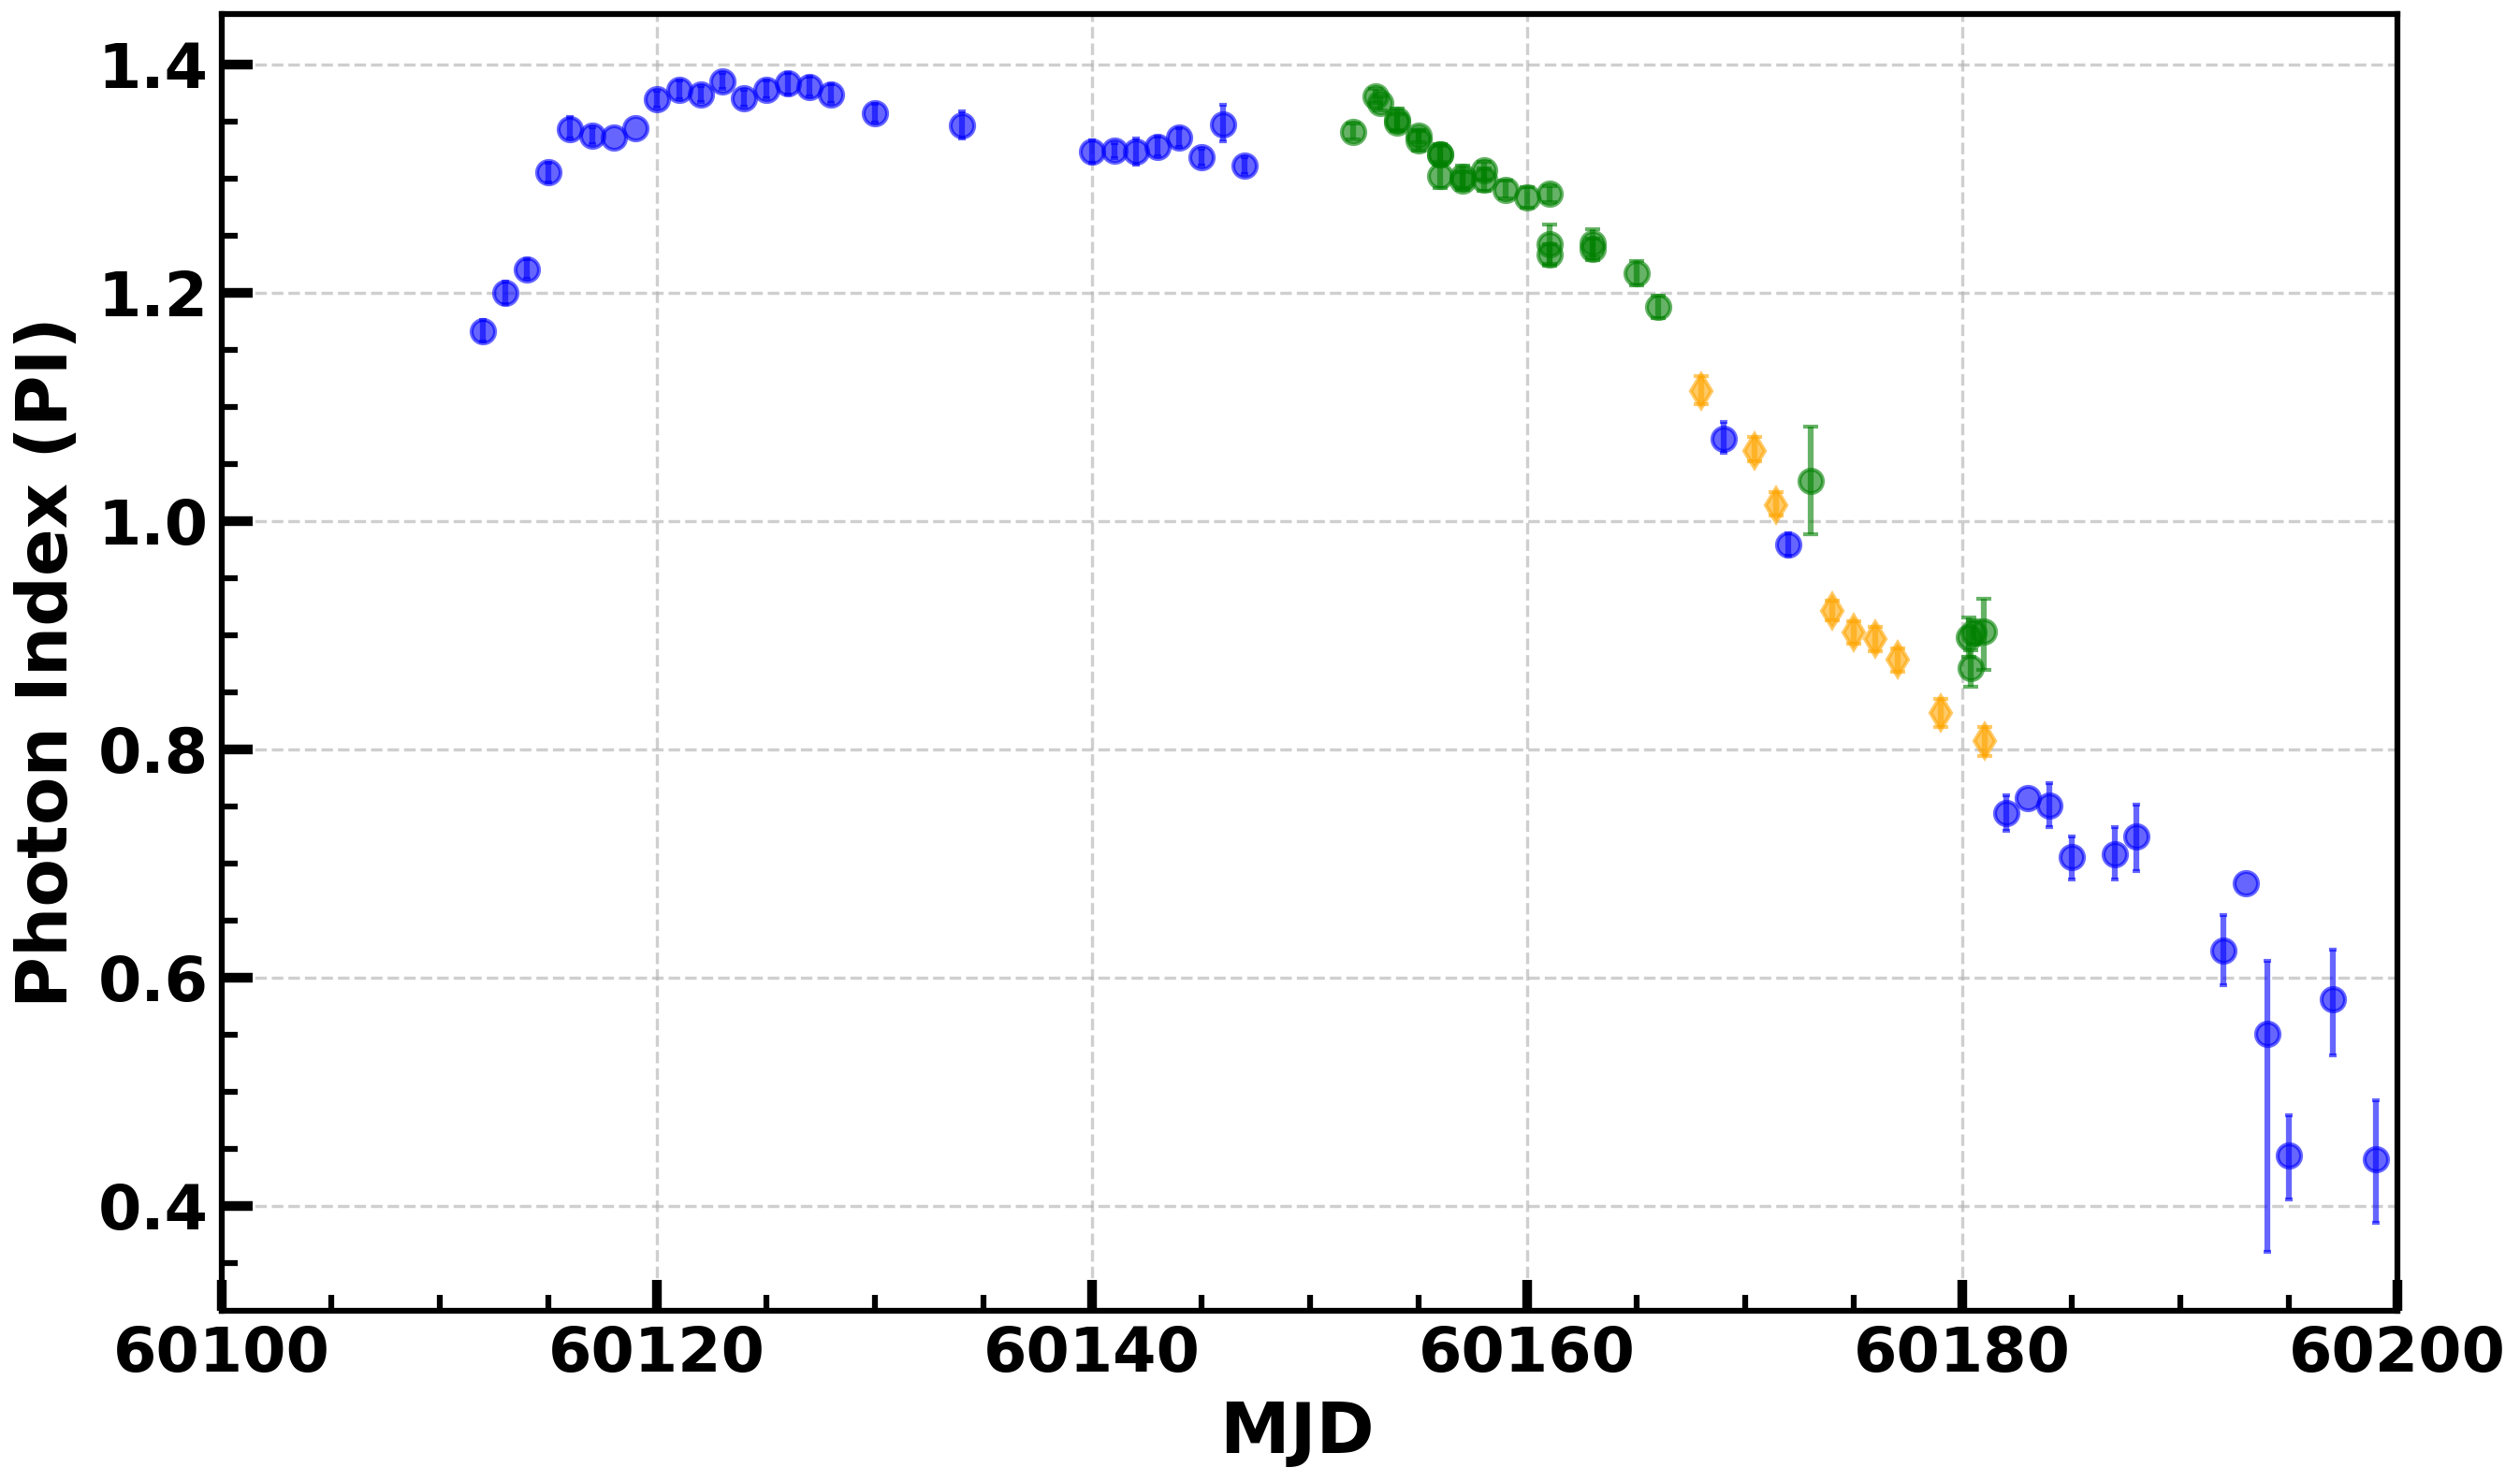

In [20]:
plt.figure(figsize=(10, 6))

yerr = [np.abs(df_nicer_index_plot['index_err_low']), np.abs(df_nicer_index_plot['index_err_high'])]
plt.errorbar(df_nicer_index_plot['MJD'], df_nicer_index_plot['index'], yerr=yerr, fmt='o', capsize=1, color='b', label='NICER',alpha=0.6)

yerr2 = np.array([df_hxmt_index_plot['index_err_low'], df_hxmt_index_plot['index_err_high']])
plt.errorbar(df_hxmt_index_plot['MJD'], df_hxmt_index_plot['index'], yerr=yerr2, fmt='o', capsize=2, color='g', label='HXMT_old', alpha=0.6)

yerr_simul=np.array([df_simul['index_1_err_low'], df_simul['index_1_err_high']])
plt.errorbar(df_simul['MJD'],df_simul['index_1'],yerr=yerr_simul,fmt='d',color='orange',capsize=2,mfc=None,alpha=0.6,label="simultaneous")

# # Filter hxmt_highecut data before MJD 60166
# df_highecut_filtered = df_hxmt_highecut[df_hxmt_highecut['MJD'] <= 60166]
# yerr_highecut = np.array([df_highecut_filtered['index_1_err_low'], df_highecut_filtered['index_1_err_high']])
# plt.errorbar(df_highecut_filtered['MJD'], df_highecut_filtered['index_1'], yerr=yerr_highecut, fmt='x', color='magenta', capsize=2, mfc=None, alpha=0.6, label="highecut_hxmt")

# plt.axvline(x=60166,color="grey",linestyle="--")
#plt.axvline(x=60175,color="grey",linestyle="-")

plt.xlabel("MJD ")
plt.ylabel("Photon Index (PI)")
plt.grid(True, linestyle='--', alpha=0.6) 
#plt.legend()
plt.xlim(60100,60200)
plt.minorticks_on()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_spectral_index_vs_MJD.png",dpi=500,bbox_inches='tight')
plt.show()

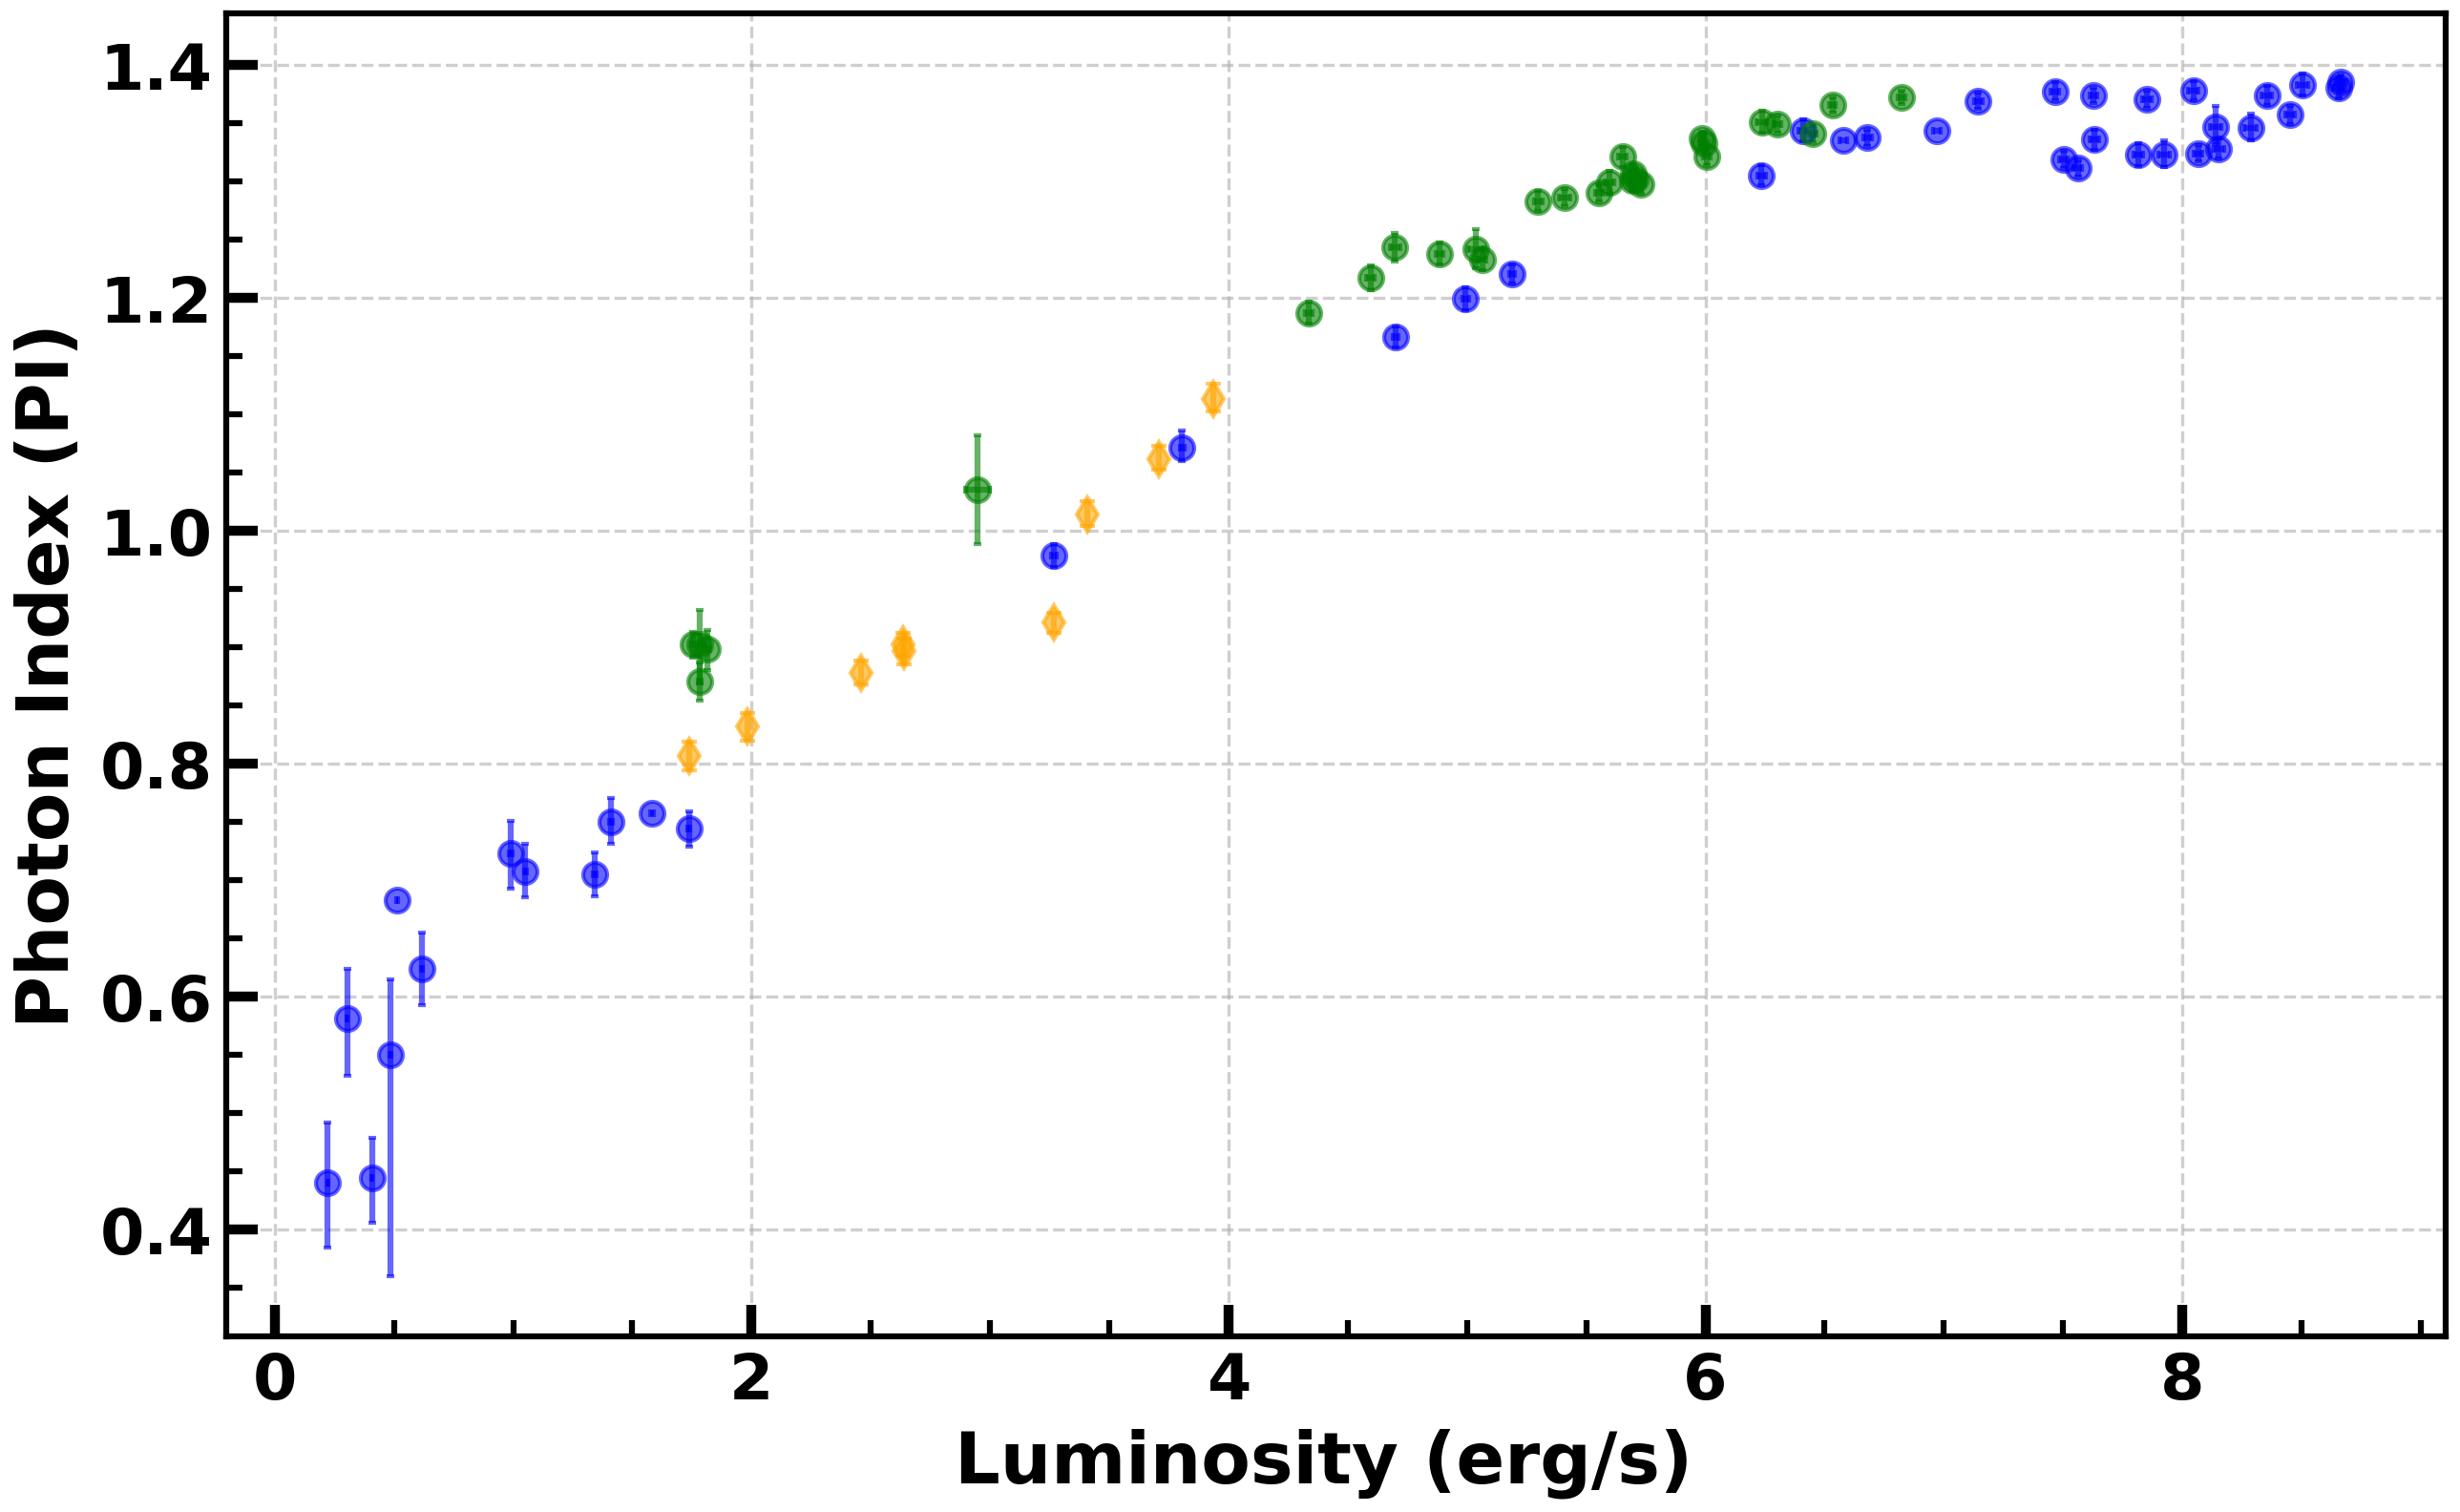

In [21]:
plt.figure(figsize=(10, 6))

yerr = [np.abs(df_nicer_index_plot['index_err_low']), np.abs(df_nicer_index_plot['index_err_high'])]
xerr =[np.abs(df_nicer_index_plot['Lumin_err_low'])/1e37, np.abs(df_nicer_index_plot['Lumin_err_high'])/1e37]
plt.errorbar(df_nicer_index_plot['Lumin']/1e37, df_nicer_index_plot['index'], yerr=yerr,xerr=xerr, fmt='o', capsize=1, color='b', label='NICER',alpha=0.6)

yerr = [np.abs(df_hxmt_index_plot['index_err_low']), np.abs(df_hxmt_index_plot['index_err_high'])]
xerr =[np.abs(df_hxmt_index_plot['Lumin_err_low'])/1e37, np.abs(df_hxmt_index_plot['Lumin_err_high'])/1e37]
plt.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['index'], yerr=yerr,xerr=xerr, fmt='o', capsize=1, color='g', label='HXMT',alpha=0.6)


# yerr2 = np.array([df_hxmt_highecut['index_1_err_low'], df_hxmt_highecut['index_1_err_high']])
# xerr2=np.array(np.abs(df_hxmt_highecut['Lumin_err_low']), np.abs(df_hxmt_highecut['Lumin_err_high']))
# plt.errorbar(df_hxmt_highecut['Lumin'], df_hxmt_highecut['index_1'], yerr=yerr2,xerr=xerr2, fmt='o', capsize=2, color='g', label='HXMT', alpha=0.6)

# yerr2 = np.array([df_old['index_err_low'], df_old['index_err_high']])
# plt.errorbar(df_old['Lumin'], df_old['index'], yerr=yerr2, fmt='o', capsize=2, color='r', label='NICER_old', alpha=0.6)

yerr_simul=np.array([df_simul['index_1_err_low'], df_simul['index_1_err_high']])
xerr2=np.array(np.abs(df_simul['Lumin_err_low'])/1e37, np.abs(df_simul['Lumin_err_high'])/1e37)
plt.errorbar(df_simul['Lumin']/1e37,df_simul['index_1'],yerr=yerr_simul,fmt='d',color='orange',capsize=2,mfc=None,alpha=0.6,label="simultaneous")


#plt.title("Powerlaw Photon Index vs sequence", fontsize=12)
plt.xlabel("Luminosity (erg/s) ")
plt.ylabel("Photon Index (PI)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
#plt.legend()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_spectral_index_vs_lumin.png",dpi=500,bbox_inches='tight')
plt.show()

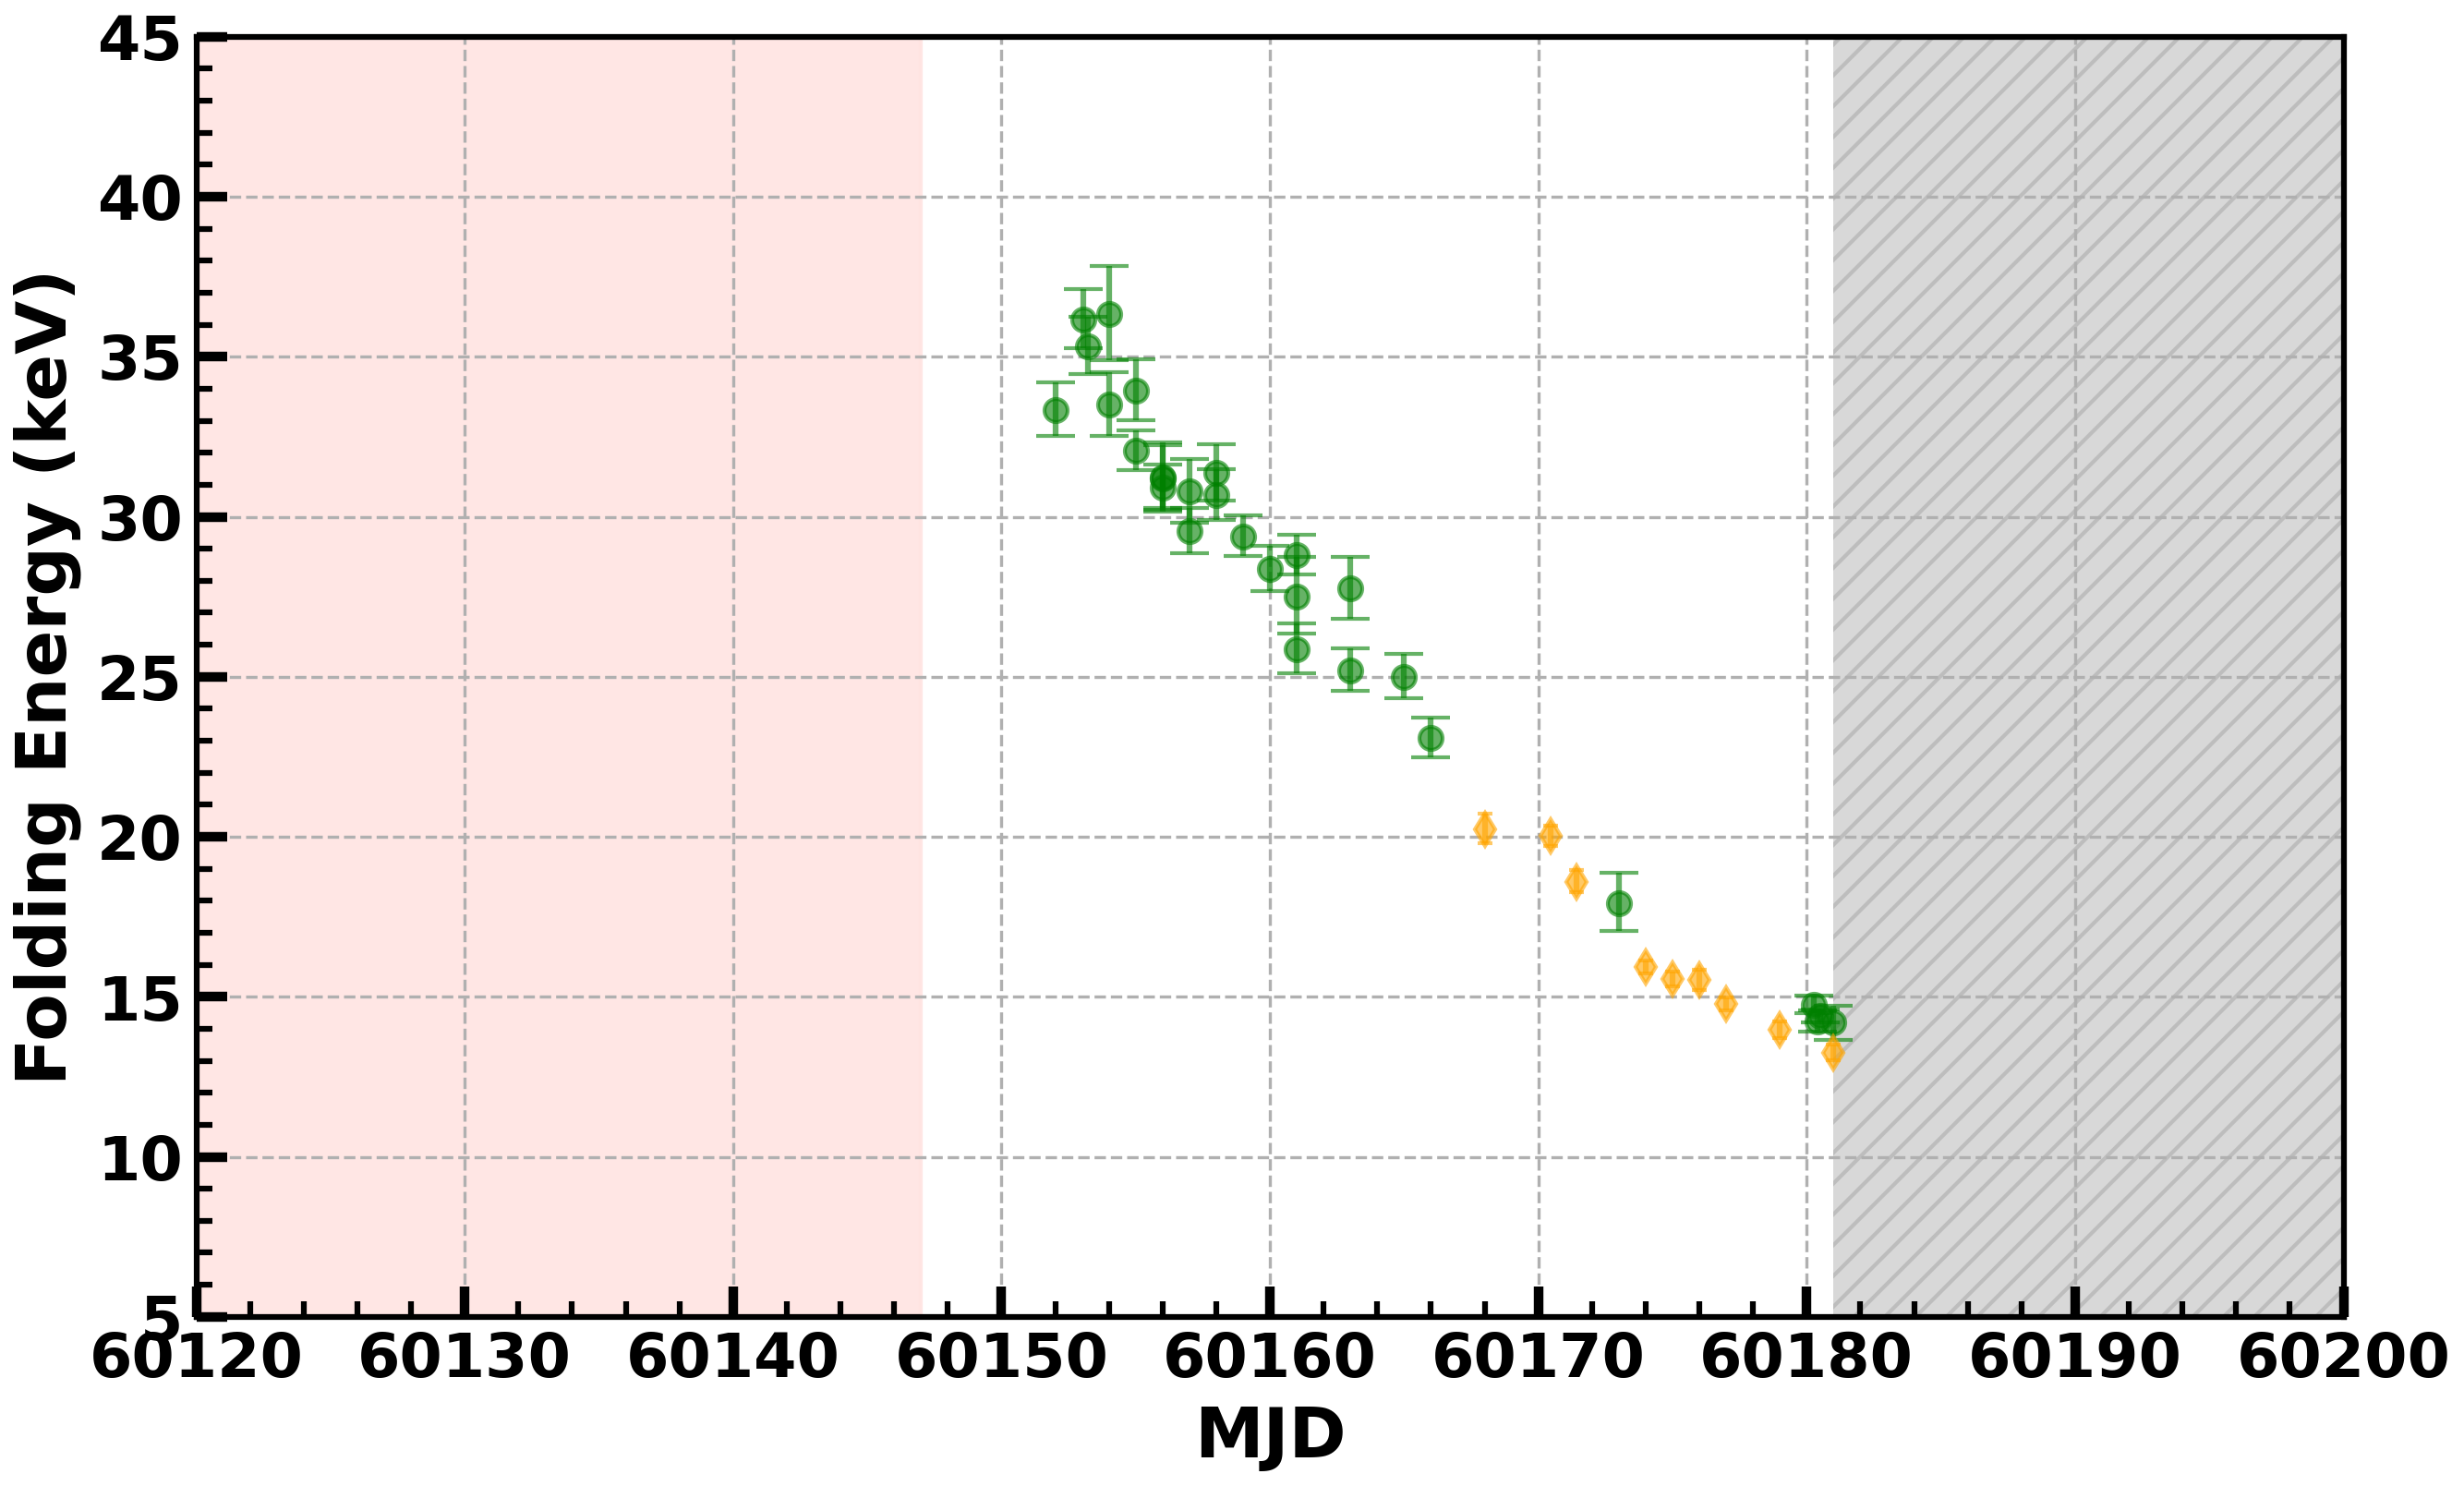

In [22]:
plt.figure(figsize=(10, 6))
# Filter rows where folding_energy is NaN
filtered_df = df_hxmt_index_plot[df_hxmt_index_plot['folding_energy'].isna()]

# Plot folding energy from df
yerr_folding = [np.abs(df_hxmt_index_plot['folding_energy_err_low']), np.abs(df_hxmt_index_plot['folding_energy_err_high'])]
xerr_folding =[np.abs(df_hxmt_index_plot['Lumin_err_low'])/1e37, np.abs(df_hxmt_index_plot['Lumin_err_high'])/1e37]
plt.errorbar(df_hxmt_index_plot['MJD'], df_hxmt_index_plot['folding_energy'], yerr=yerr_folding, fmt='o', capsize=5, color='g', label='folding energy in hxmt', alpha=0.6)

# # Plot highecut from df for rows where folding_energy is NaN
# yerr_high2 = np.array([filtered_df['highecut_err_low'], filtered_df['highecut_err_high']])
# plt.errorbar(filtered_df['MJD'], filtered_df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='red', label='cutoff energy in hxmt', alpha=0.6)

# Plot highecut from df_nicer_index_plot
# yerr_highecut_df2 = [np.abs(df_nicer_index_plot['folding_energy_err_low']), np.abs(df_nicer_index_plot['folding_energy_err_high'])]
# plt.errorbar(df_nicer_index_plot['MJD'], df_nicer_index_plot['folding_energy'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='blue', label='folding energy in NICER', alpha=0.6)

# # Plot highecut from df_highecut hxmt version
# yerr_highecut_hxmt = [np.abs(df_hxmt_highecut['folding_energy_err_low']), np.abs(df_hxmt_highecut['folding_energy_err_high'])]
# plt.errorbar(df_hxmt_highecut['MJD'], df_hxmt_highecut['folding_energy'], yerr=yerr_highecut_hxmt, fmt='x', capsize=2, color='magenta', label='folding energy in HXMT', alpha=0.6)

# Plot highecut from df_simul
yerr_highecut_simul = [np.abs(df_simul['folding_energy_err_low']), np.abs(df_simul['folding_energy_err_high'])]
plt.errorbar(df_simul['MJD'], df_simul['folding_energy'], yerr=yerr_highecut_simul, fmt='d', capsize=2, color='orange', label='folding energy simultaneous', alpha=0.6)

# Add shaded region
plt.axvspan(60112, 60147, color='mistyrose', alpha=0.9, label='NICER fixed at 34 keV')
plt.axvspan(60181, 60200,color='gray', alpha=0.3, hatch='///', linewidth=0, label='NICER fixed at 34 keV')

# Add labels, legend, and grid
plt.grid(True,linestyle="--")
plt.minorticks_on()
plt.xlabel("MJD")
plt.ylabel("Folding Energy (keV)")
plt.ylim(5, 45)
plt.xlim(60120,60200)
#plt.legend()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_folding_v_mjd.png",dpi=500,bbox_inches='tight')
plt.show()

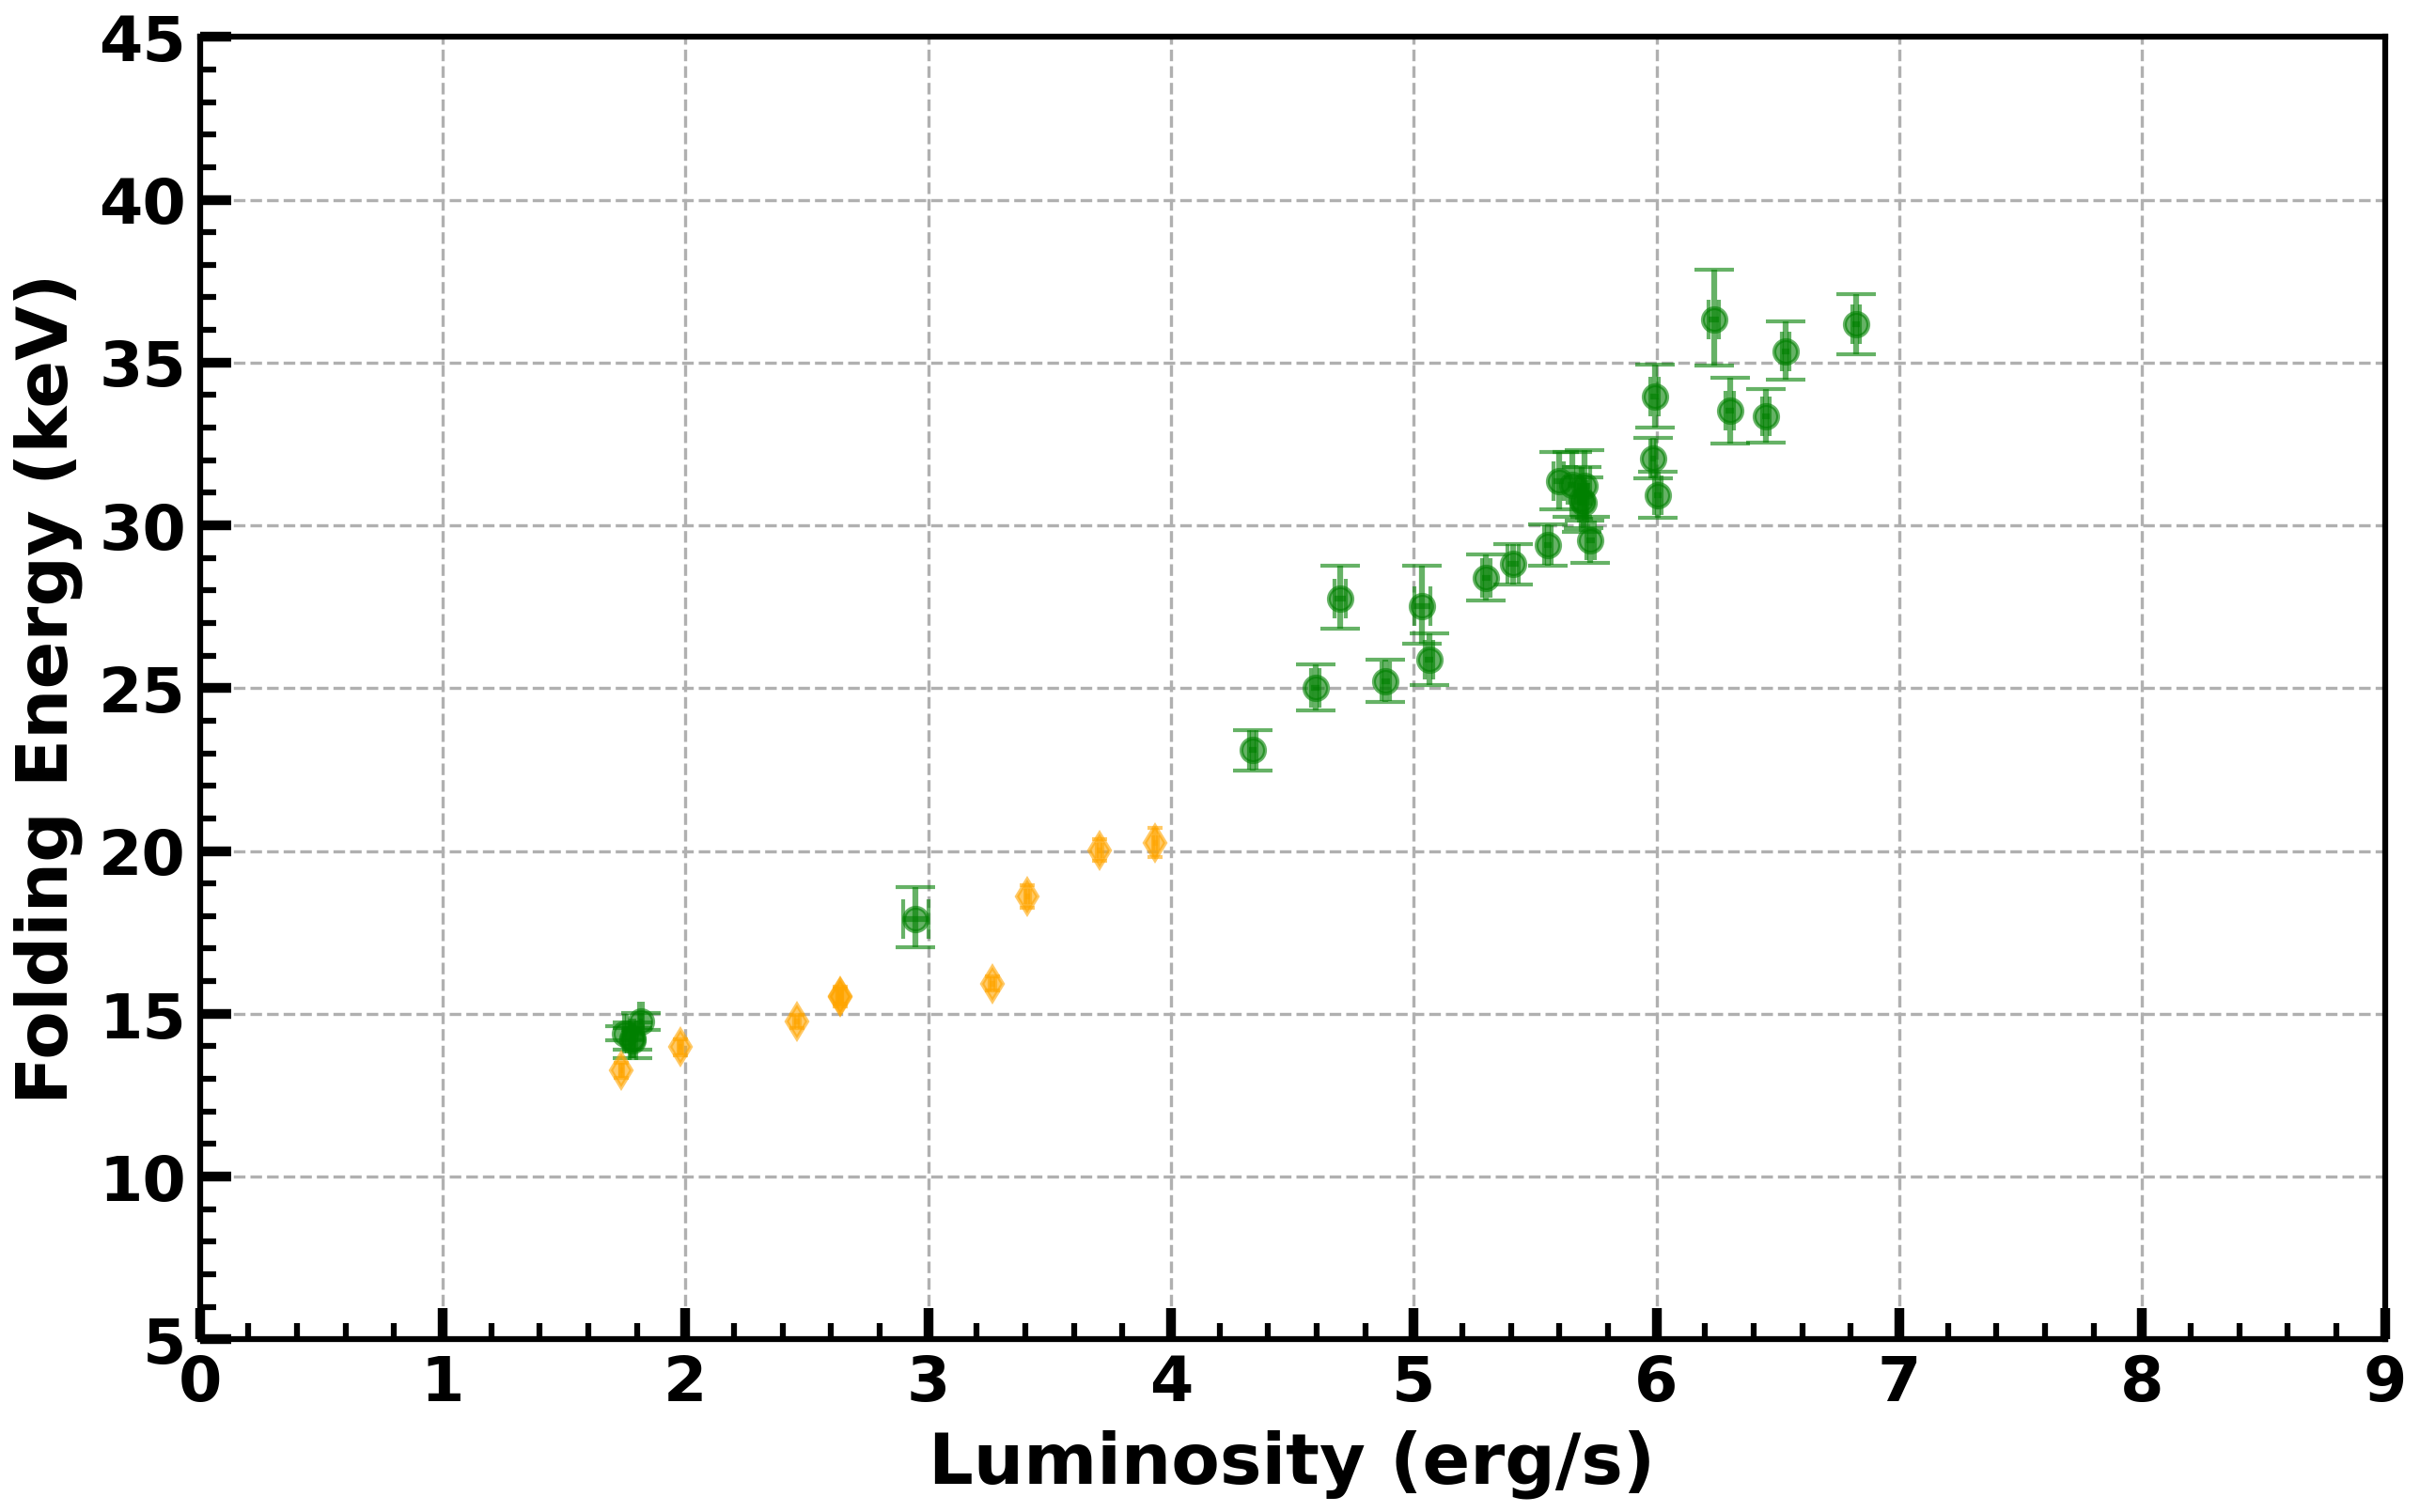

In [23]:
plt.figure(figsize=(10, 6))
# Filter rows where folding_energy is NaN
filtered_df = df_hxmt_index_plot[df_hxmt_index_plot['folding_energy'].isna()]

# Plot folding energy from df
yerr_folding = [np.abs(df_hxmt_index_plot['folding_energy_err_low']), np.abs(df_hxmt_index_plot['folding_energy_err_high'])]
xerr_folding =[np.abs(df_hxmt_index_plot['Lumin_err_low'])/1e37, np.abs(df_hxmt_index_plot['Lumin_err_high'])/1e37]
plt.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['folding_energy'], yerr=yerr_folding,xerr=xerr_folding, fmt='o', capsize=5, color='g', label='folding energy in hxmt', alpha=0.6)

# # Plot highecut from df for rows where folding_energy is NaN
# yerr_high2 = np.array([filtered_df['highecut_err_low'], filtered_df['highecut_err_high']])
# plt.errorbar(filtered_df['MJD'], filtered_df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='red', label='cutoff energy in hxmt', alpha=0.6)

# Plot highecut from df_nicer_index_plot
# yerr_highecut_df2 = [np.abs(df_nicer_index_plot['folding_energy_err_low']), np.abs(df_nicer_index_plot['folding_energy_err_high'])]
# plt.errorbar(df_nicer_index_plot['MJD'], df_nicer_index_plot['folding_energy'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='blue', label='folding energy in NICER', alpha=0.6)

# # Plot highecut from df_highecut hxmt version
# yerr_highecut_hxmt = [np.abs(df_hxmt_highecut['folding_energy_err_low']), np.abs(df_hxmt_highecut['folding_energy_err_high'])]
# plt.errorbar(df_hxmt_highecut['MJD'], df_hxmt_highecut['folding_energy'], yerr=yerr_highecut_hxmt, fmt='x', capsize=2, color='magenta', label='folding energy in HXMT', alpha=0.6)

# Plot highecut from df_simul
yerr_highecut_simul = [np.abs(df_simul['folding_energy_err_low']), np.abs(df_simul['folding_energy_err_high'])]
xerr_highecut_simul =[np.abs(df_simul['Lumin_err_low'])/1e37, np.abs(df_simul['Lumin_err_high'])/1e37]
plt.errorbar(df_simul['Lumin']/1e37, df_simul['folding_energy'], yerr=yerr_highecut_simul, xerr=xerr_highecut_simul, fmt='d', capsize=2, color='orange', label='folding energy simultaneous', alpha=0.6)

# Add shaded region
# plt.axvspan(60112, 60147, color='gray', alpha=0.3, label='NICER fixed at 34 keV')
# plt.axvspan(60181, 60200, color='gray', alpha=0.4, label='NICER fixed at 34 keV')

# Add labels, legend, and grid
plt.grid(True,linestyle="--")
plt.minorticks_on()
plt.xlabel('Luminosity (erg/s)')
plt.ylabel("Folding Energy (keV)")
plt.ylim(5, 45)
plt.xlim(0,9)
#plt.legend()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_folding_v_lumin.png",dpi=500,bbox_inches='tight')
plt.show()

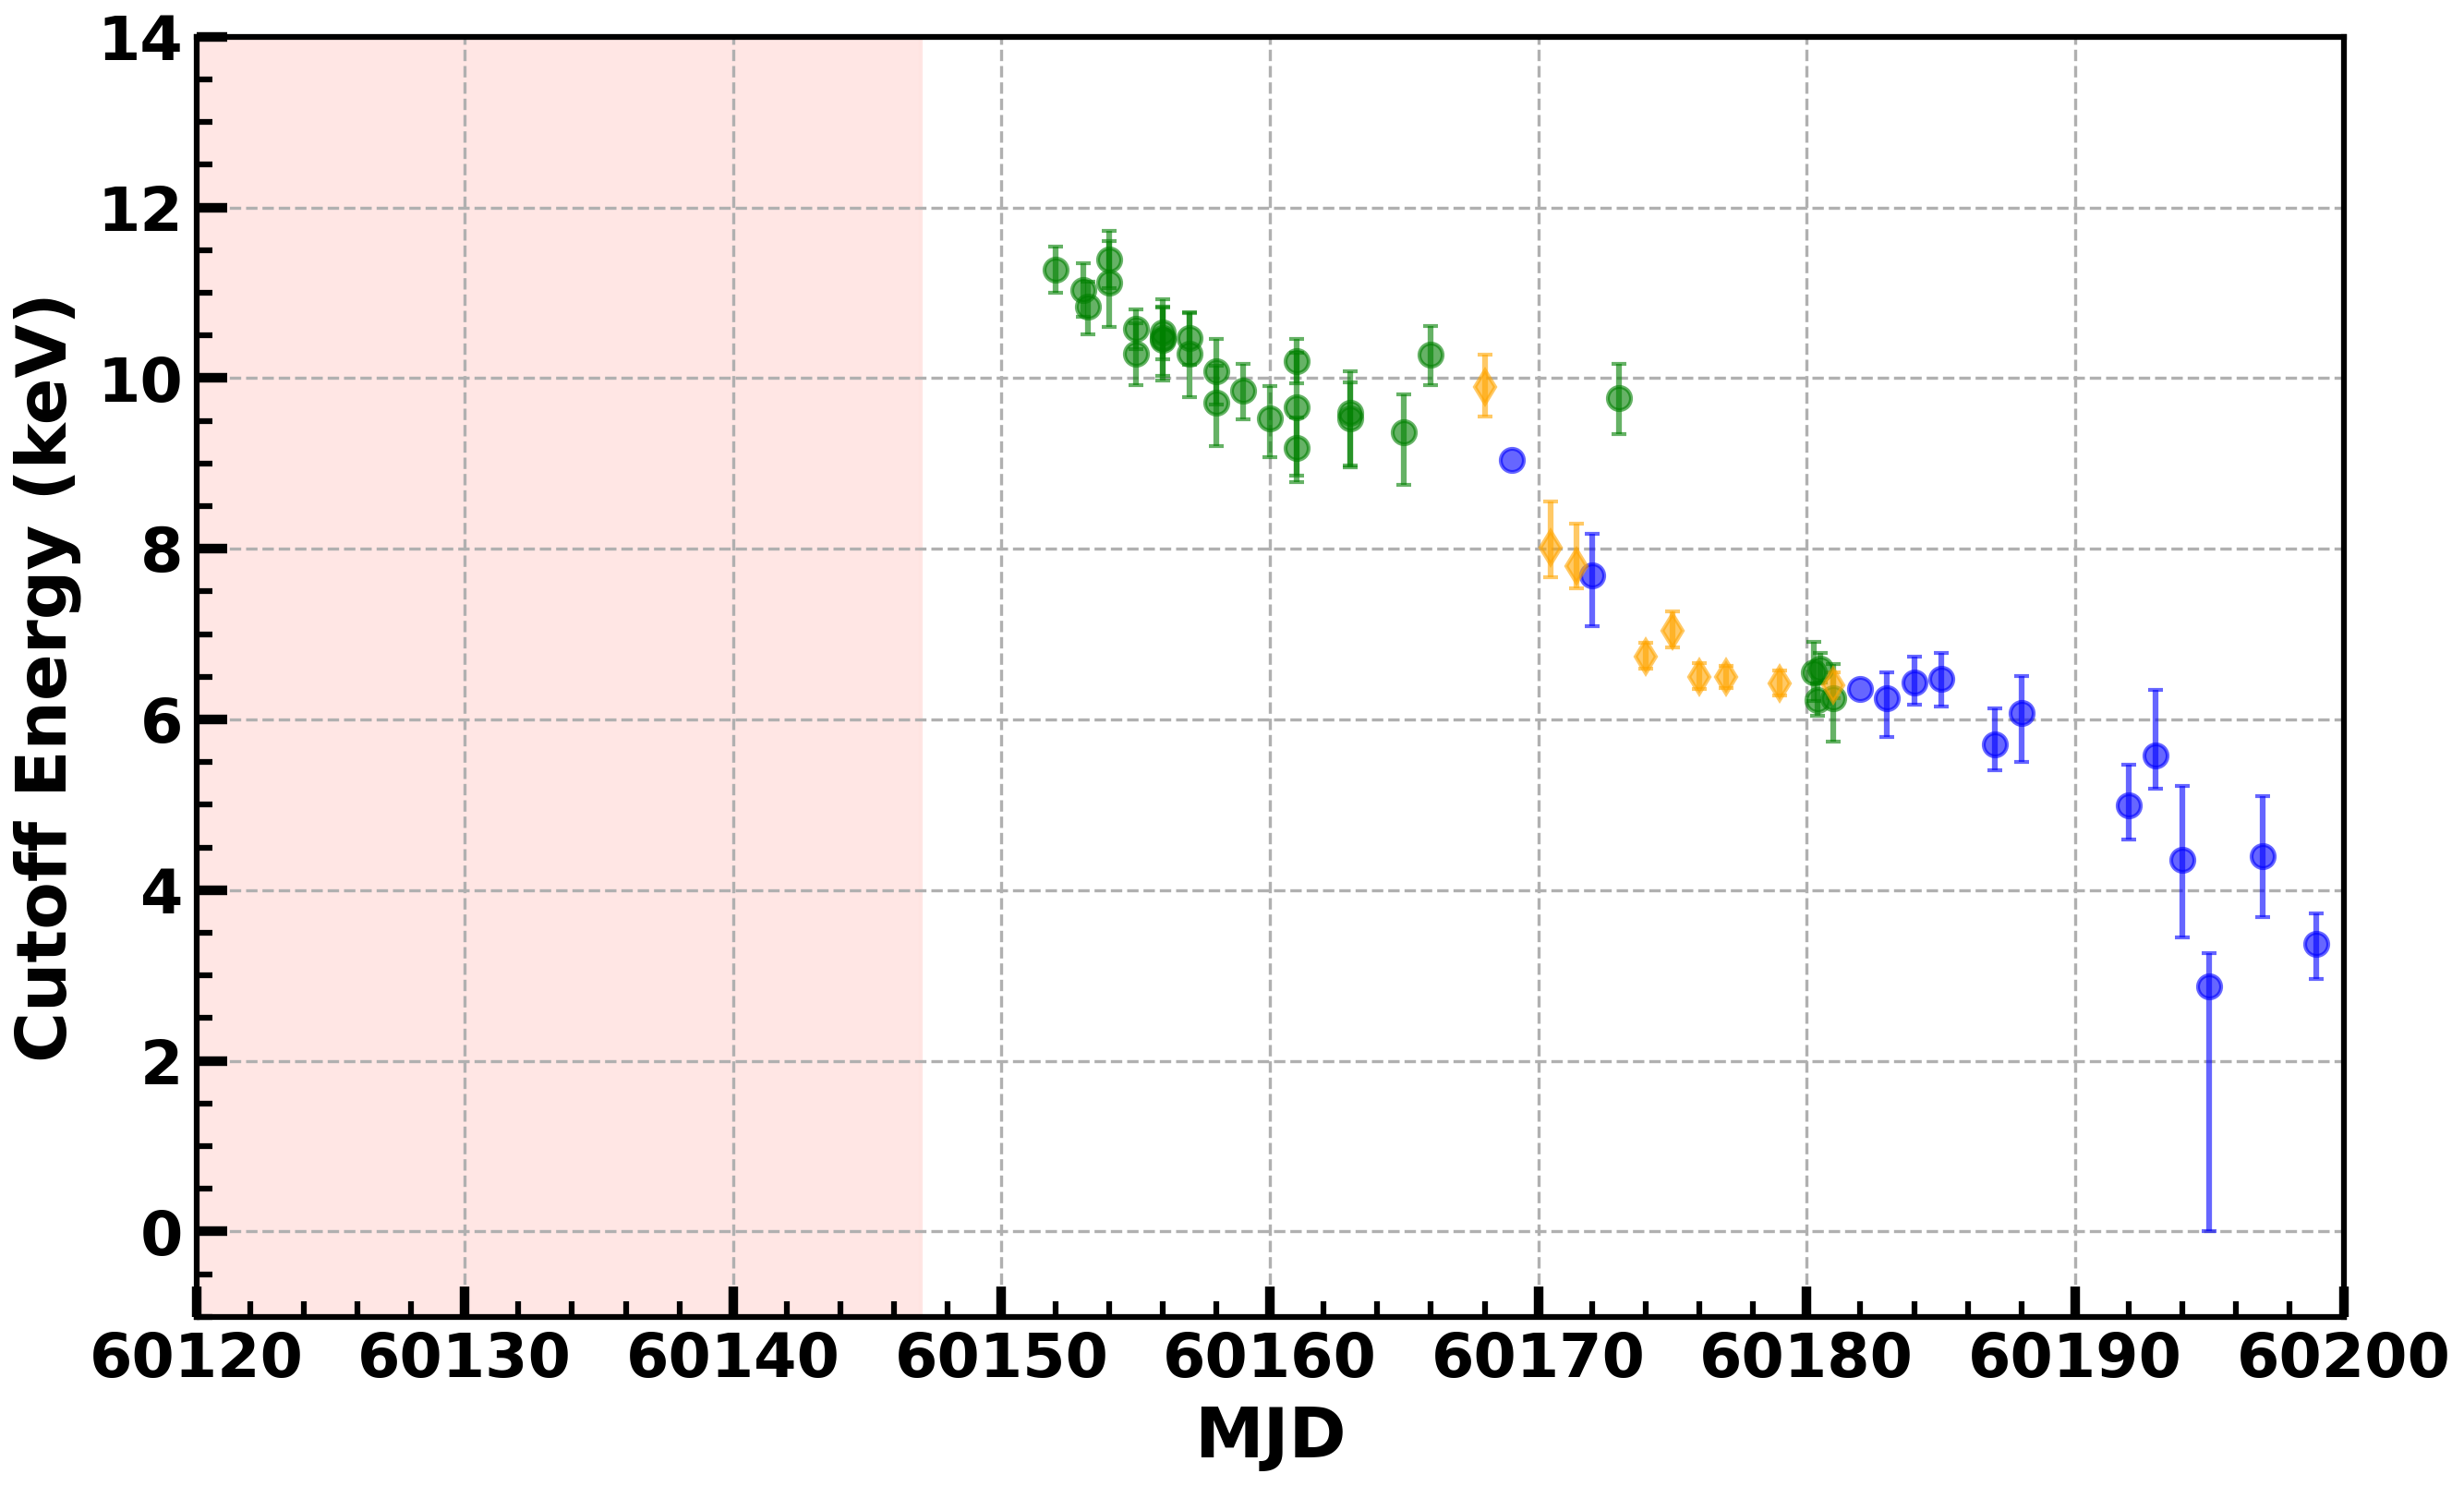

In [24]:
plt.figure(figsize=(10, 6))

# # Plot folding energy from df
# yerr_folding = [np.abs(filtered_df['highecut_err_low']), np.abs(filtered_df['highecut_err_high'])]
# plt.errorbar(filtered_df['MJD'], filtered_df['highecut'], yerr=yerr_folding, fmt='o', capsize=5, color='g', label='cutoff energy in HXMT', alpha=0.6)

# # Plot highecut from df for rows where folding_energy is NaN
# yerr_high2 = np.array([filtered_df['highecut_err_low'], filtered_df['highecut_err_high']])
# plt.errorbar(filtered_df['MJD'], filtered_df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='red', label='cutoff energy in hxmt', alpha=0.6)

# Plot highecut from df_nicer_index_plot
yerr_highecut_df2 = [np.abs(df_nicer_index_plot['highecut_err_low']), np.abs(df_nicer_index_plot['highecut_err_high'])]
plt.errorbar(df_nicer_index_plot['MJD'], df_nicer_index_plot['highecut'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='blue', label='cutoff energy in NICER', alpha=0.6)

# Plot highecut from df_highecut hxmt version
yerr_highecut_hxmt = [np.abs(df_hxmt_index_plot['highecut_err_low']), np.abs(df_hxmt_index_plot['highecut_err_high'])]
plt.errorbar(df_hxmt_index_plot['MJD'], df_hxmt_index_plot['highecut'], yerr=yerr_highecut_hxmt, fmt='o', capsize=2, color='g', label='cutoff energy in HXMT', alpha=0.6)

# Plot highecut from df_simul
yerr_highecut_simul = [np.abs(df_simul['highecut_err_low']), np.abs(df_simul['highecut_err_high'])]
plt.errorbar(df_simul['MJD'], df_simul['highecut'], yerr=yerr_highecut_simul, fmt='d', capsize=2, color='orange', label='cutoff energy simultaneous', alpha=0.6)


plt.axvspan(60112, 60147, color='mistyrose', alpha=0.9, label='NICER fixed at 34 keV')
# Add labels, legend, and grid
plt.grid(True,linestyle="--")
plt.minorticks_on()
plt.xlabel("MJD")
plt.ylabel("Cutoff Energy (keV)")
plt.ylim(-1, 14)
plt.xlim(60120,60200)
#plt.legend()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_cutoff_v_mjd.png",dpi=500,bbox_inches='tight')
plt.show()

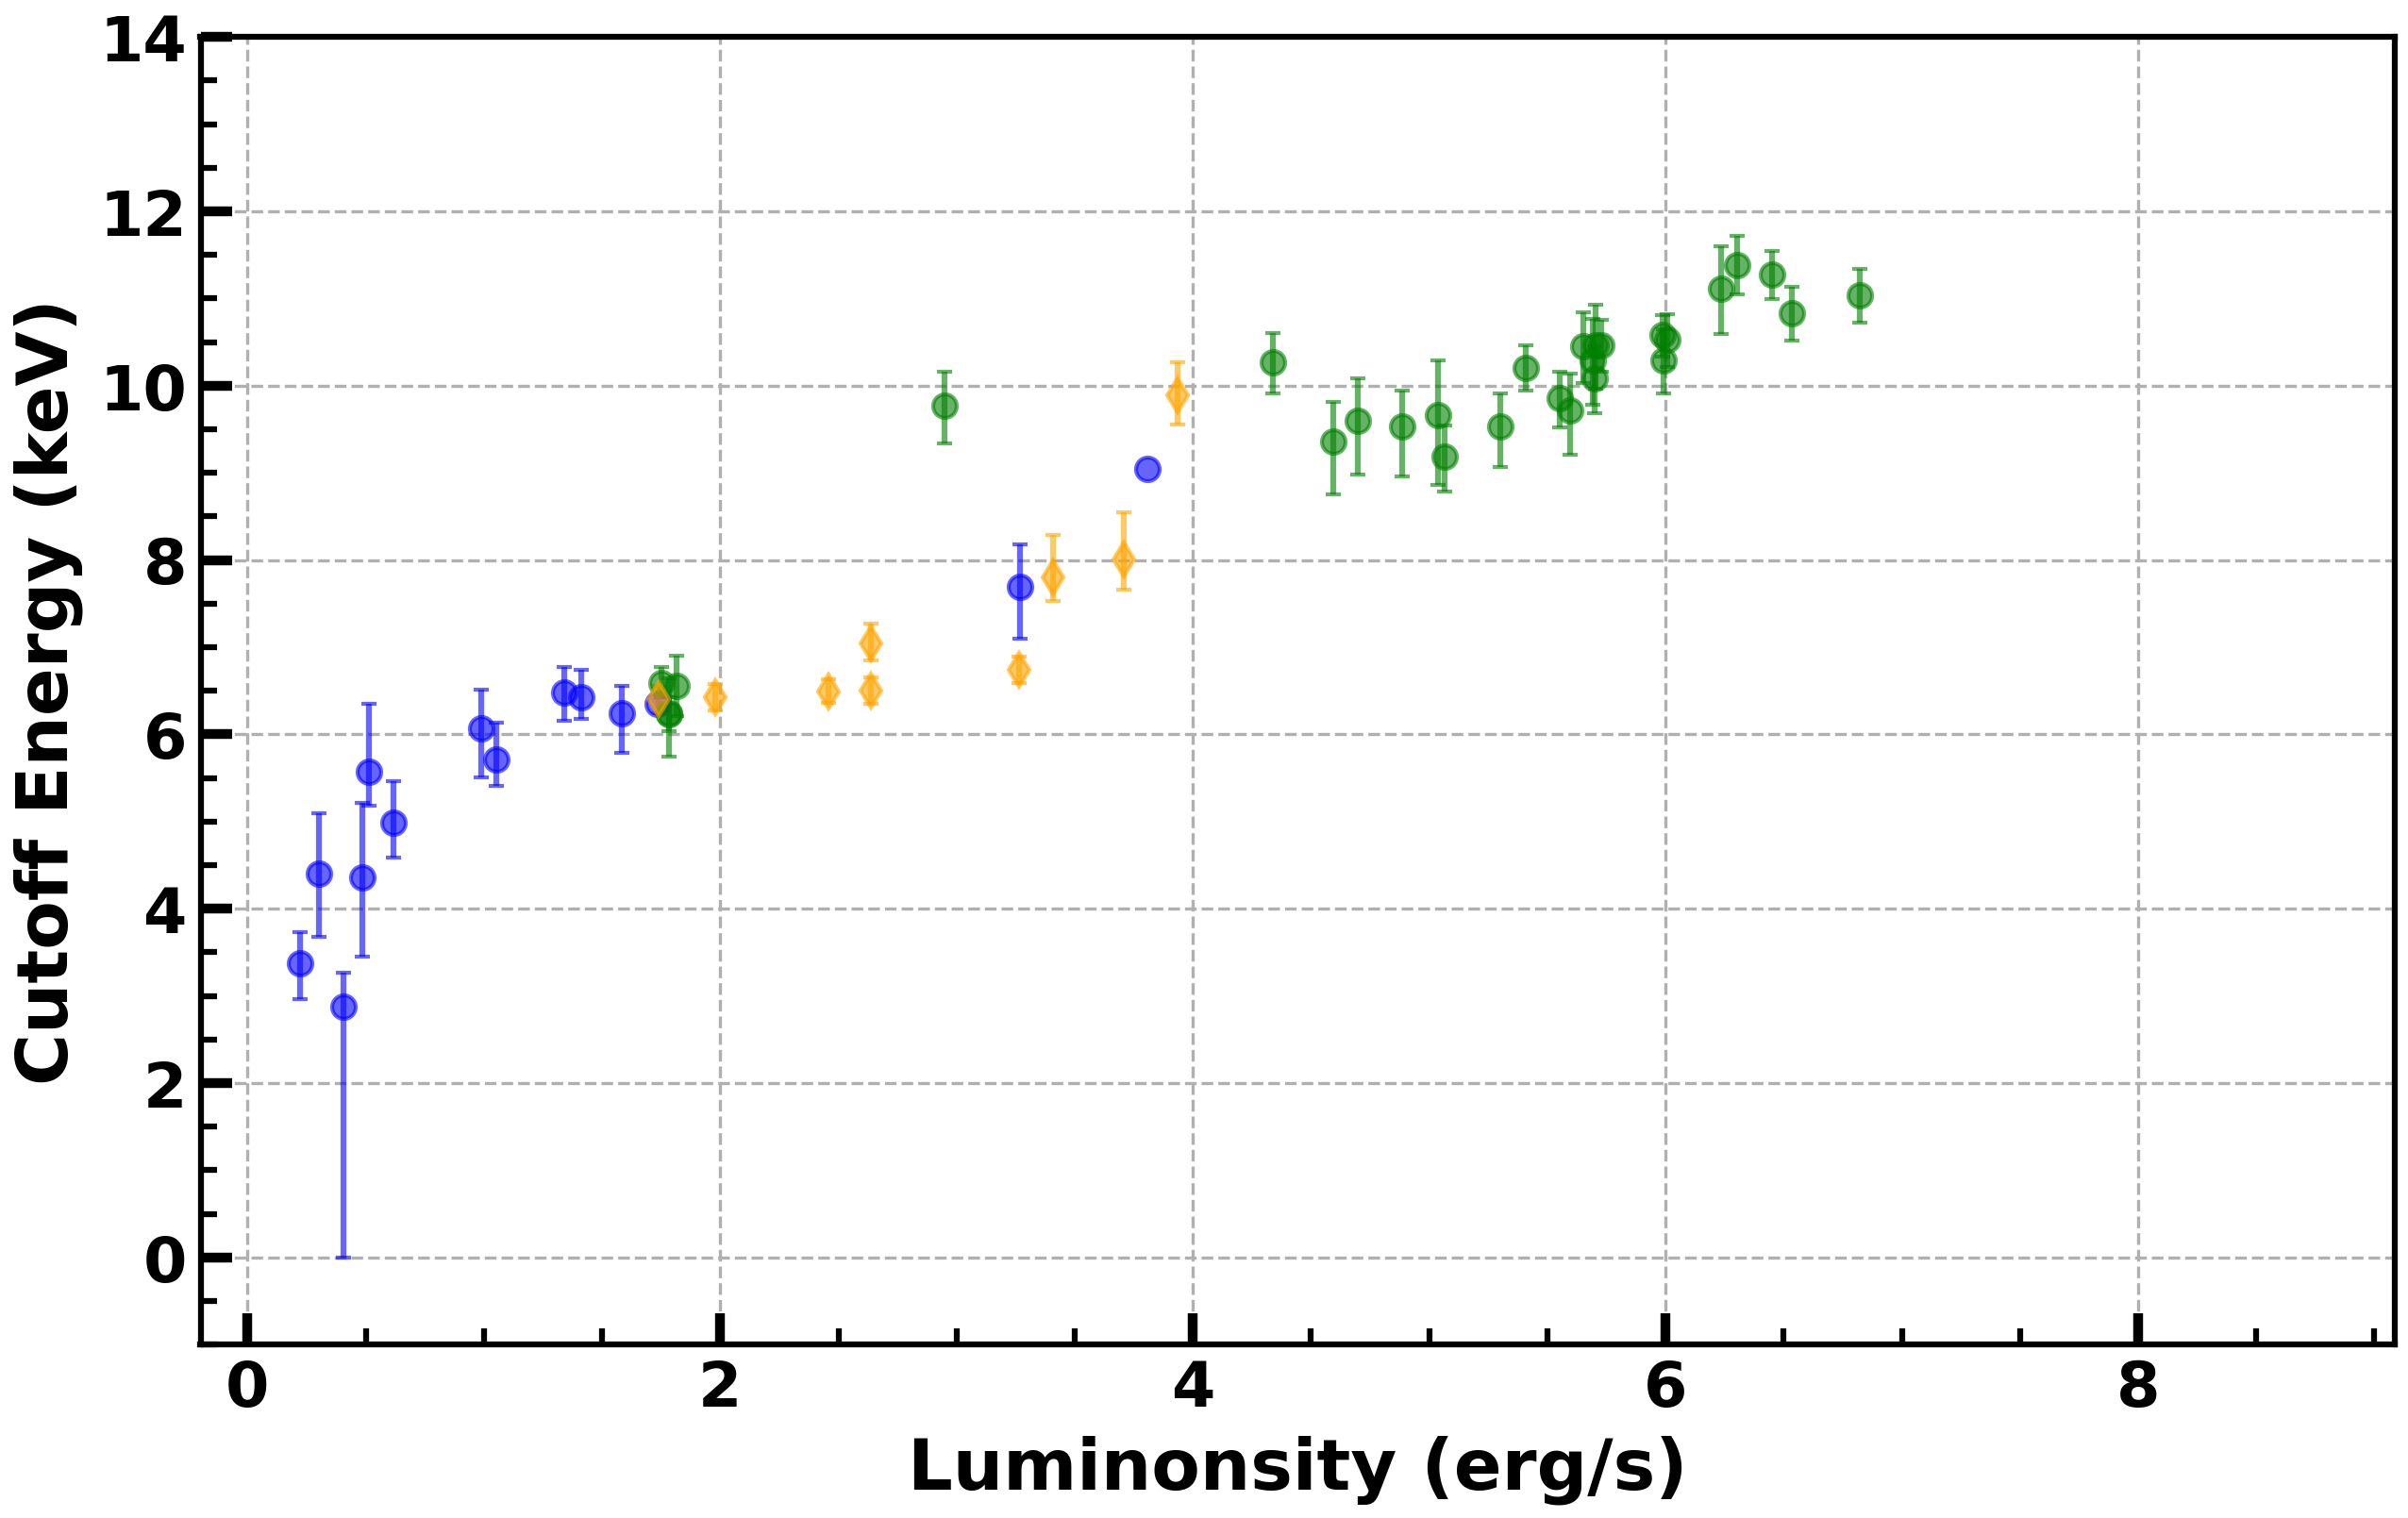

In [25]:
plt.figure(figsize=(10, 6))

# # Plot folding energy from df
# yerr_folding = [np.abs(filtered_df['highecut_err_low']), np.abs(filtered_df['highecut_err_high'])]
# plt.errorbar(filtered_df['Lumin'], filtered_df['highecut'], yerr=yerr_folding, fmt='o', capsize=5, color='g', label='cutoff energy in HXMT', alpha=0.6)

# # Plot highecut from df for rows where folding_energy is NaN
# yerr_high2 = np.array([filtered_df['highecut_err_low'], filtered_df['highecut_err_high']])
# plt.errorbar(filtered_df['Lumin'], filtered_df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='red', label='cutoff energy in hxmt', alpha=0.6)

# Plot highecut from df_nicer_index_plot
yerr_highecut_df2 = [np.abs(df_nicer_index_plot['highecut_err_low']), np.abs(df_nicer_index_plot['highecut_err_high'])]
plt.errorbar(df_nicer_index_plot['Lumin']/1e37, df_nicer_index_plot['highecut'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='blue', label='cutoff energy in NICER', alpha=0.6)

# Plot highecut from df_highecut hxmt version
yerr_highecut_hxmt = [np.abs(df_hxmt_index_plot['highecut_err_low']), np.abs(df_hxmt_index_plot['highecut_err_high'])]
plt.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['highecut'], yerr=yerr_highecut_hxmt, fmt='o', capsize=2, color='g', label='cutoff energy in HXMT', alpha=0.6)

# Plot highecut from df_simul
yerr_highecut_simul = [np.abs(df_simul['highecut_err_low']), np.abs(df_simul['highecut_err_high'])]
plt.errorbar(df_simul['Lumin']/1e37, df_simul['highecut'], yerr=yerr_highecut_simul, fmt='d', capsize=2, color='orange', label='cutoff energy simultaneous', alpha=0.6)


#plt.axvline(x=60166, color='gray', linestyle='--')
# Add labels, legend, and grid
plt.grid(True,linestyle="--")
plt.minorticks_on()
plt.xlabel("Luminonsity (erg/s)")
plt.ylabel("Cutoff Energy (keV)")
plt.ylim(-1, 14)
#plt.xlim(60120,60200)
#plt.legend()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_cutoff_v_Lumin.png",dpi=500,bbox_inches='tight')
plt.show()

In [30]:
df_old.columns

Index(['2.09848E+22', 'Flux (dist 6.8 kpc)', 'Lumin', 'MJD', 'Obs ID',
       'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
       'folding_energy', 'lineE', 'lineSigma', 'reduced/chi-sq', 'nH_err',
       'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
       'lineE_err', 'lineSigma_err', 'nH_err_low', 'nH_err_high',
       'index_err_low', 'index_err_high', 'norm_err_low', 'norm_err_high',
       'highecut_err_low', 'highecut_err_high', 'folding_energy_err_low',
       'folding_energy_err_high', 'lineE_err_low', 'lineE_err_high',
       'lineSigma_err_low', 'lineSigma_err_high', 'seq'],
      dtype='object')

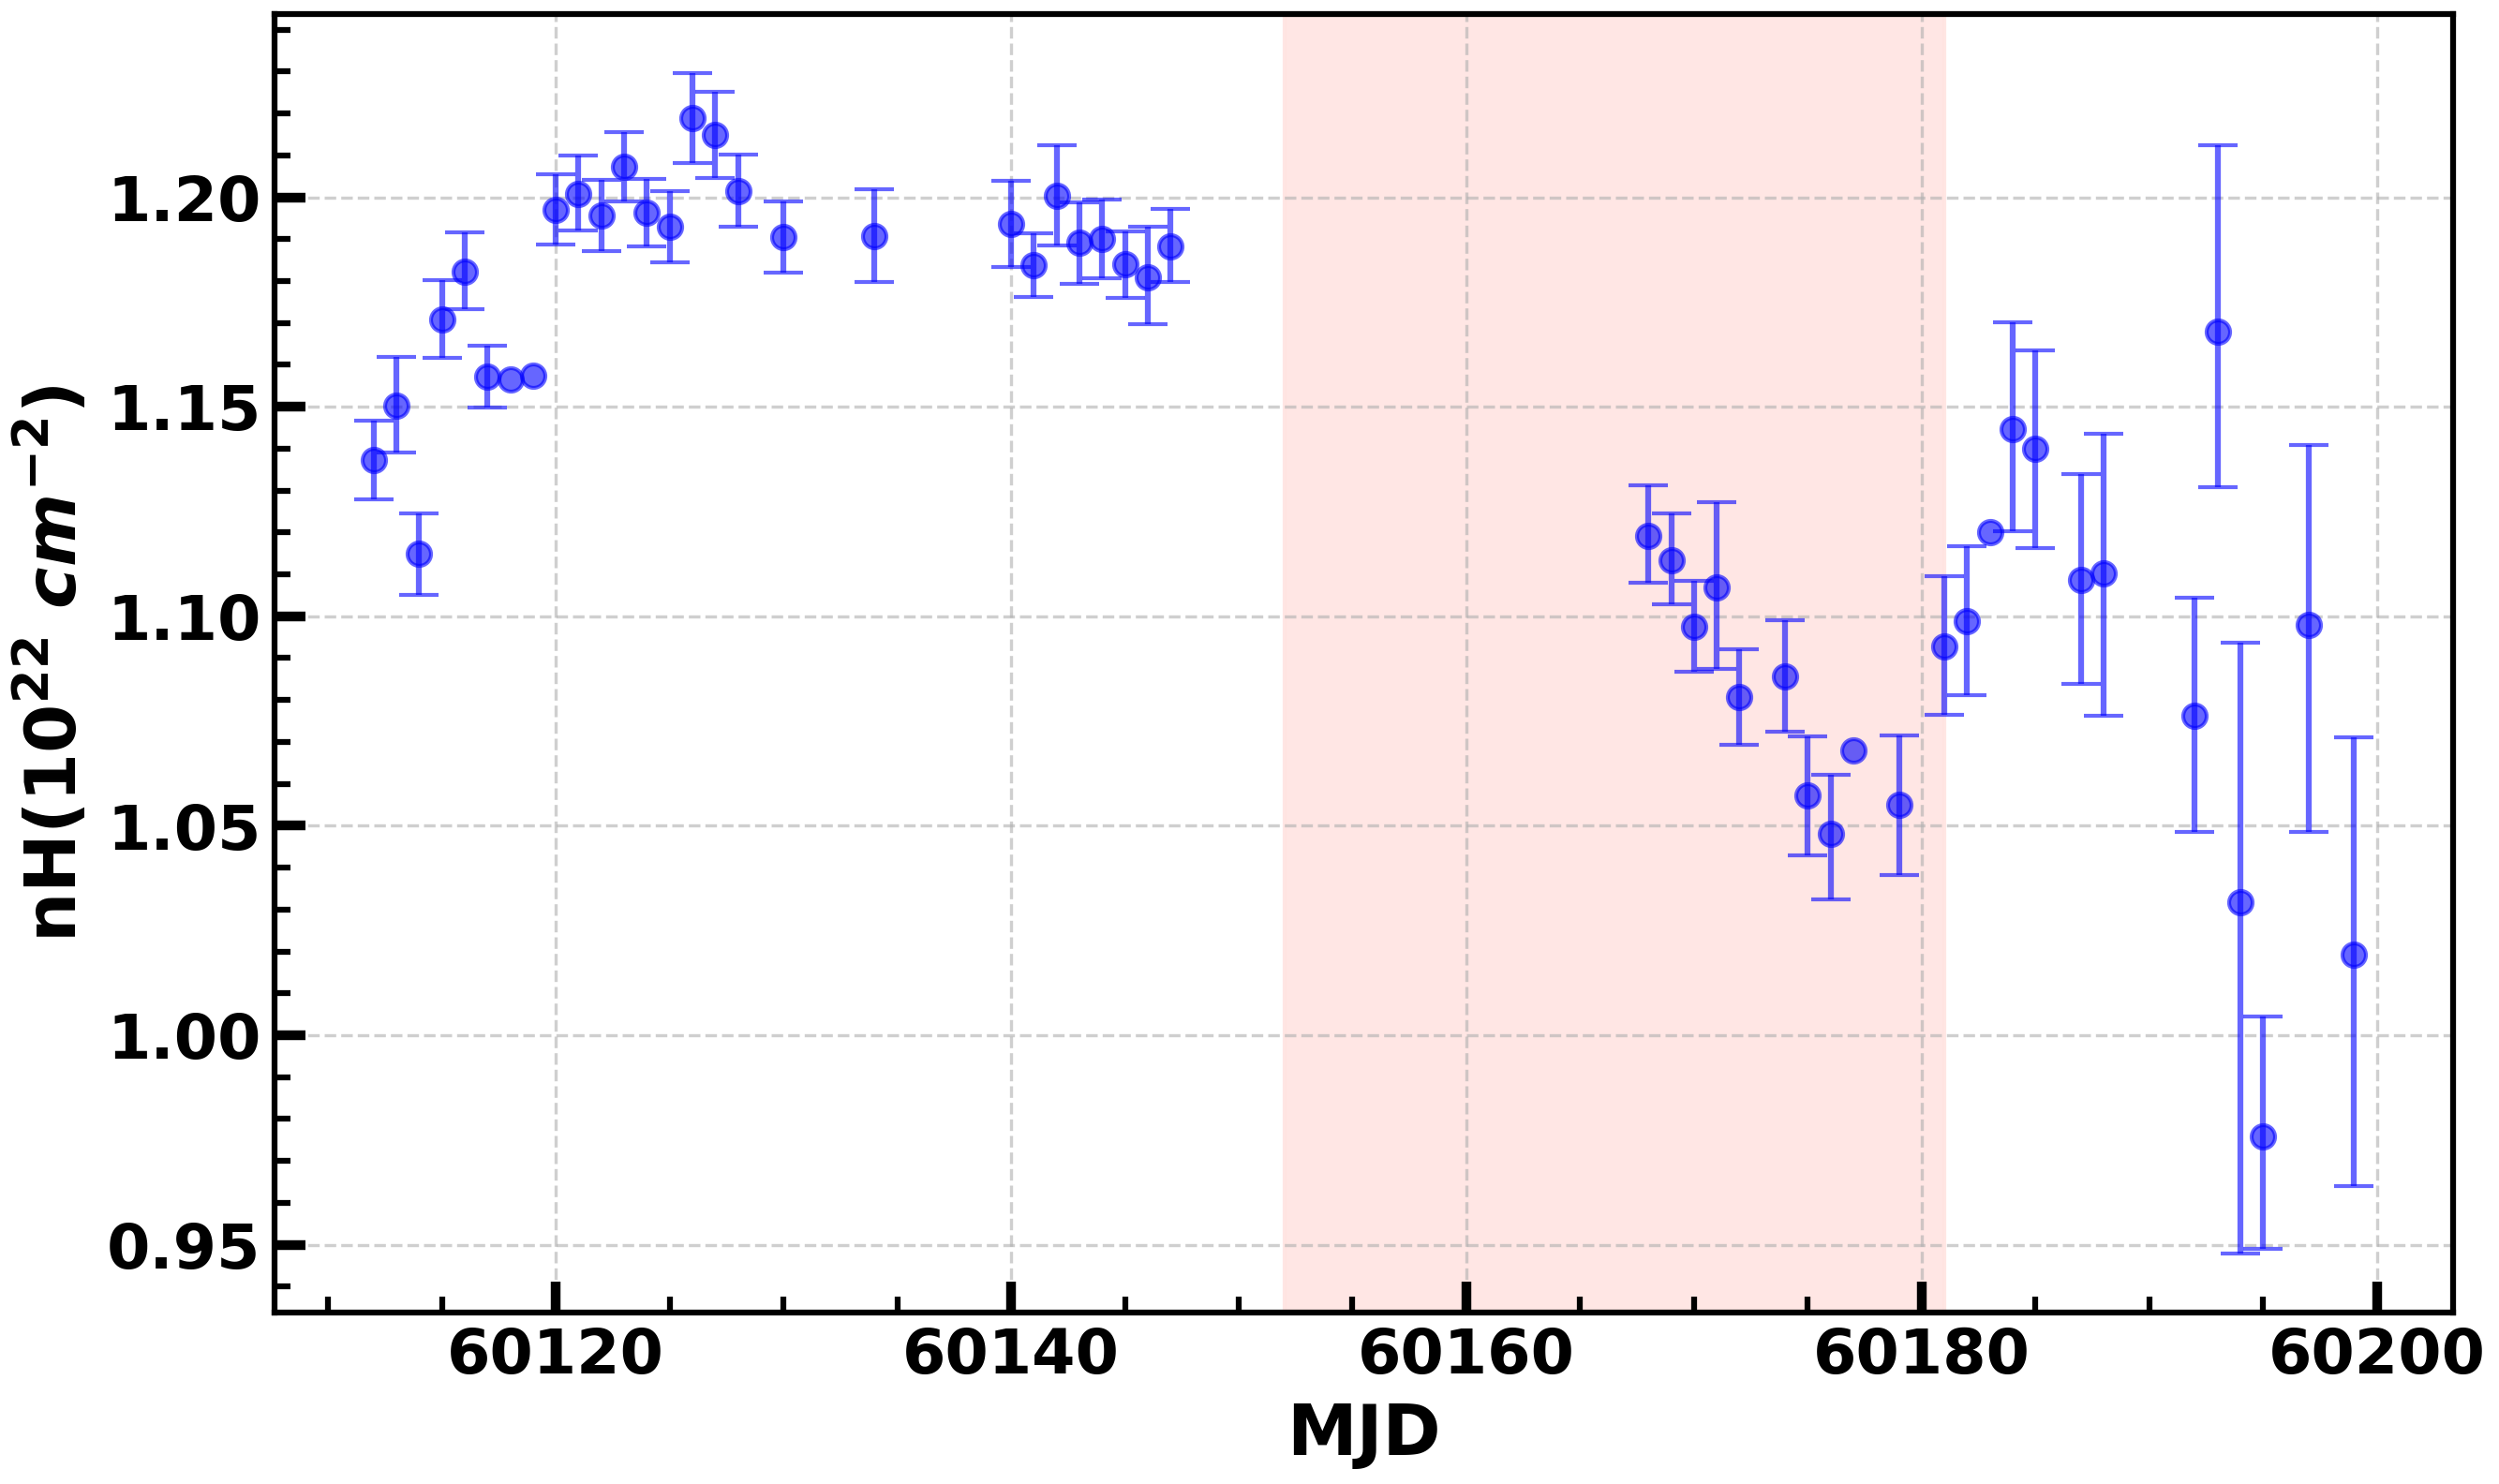

In [27]:
plt.figure(figsize=(10, 6))
nh_yerr = [np.abs(df_nicer['nH_err_low']), np.abs(df_nicer['nH_err_high'])]
plt.errorbar(df_nicer['MJD'], df_nicer['nH'], yerr=nh_yerr, fmt='o', capsize=5, color='b', label='nH_new', alpha=0.6)
plt.ylabel("nH($10^{22}~cm^{-2}$)")
plt.xlabel("MJD")
# nh_yerr_old = [np.abs(df_old['nH_err_low']), np.abs(df_old['nH_err_high'])]
# plt.errorbar(df_old['MJD'], df_old['nH'], yerr=nh_yerr_old, fmt='o', capsize=1, color='red', label='nH_old', alpha=0.3)
# plt.plot(df['MJD'], df['nH'], 'o', color='green', label='nH_HXMT', alpha=0.3)

# Add shaded region
plt.axvspan(60152, 60181, color='mistyrose', alpha=0.9, label='Shaded Region')

# plt.legend()
plt.grid(alpha=0.6, linestyle='--')

plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_nH_vs_MJD.png",dpi=500,bbox_inches='tight')


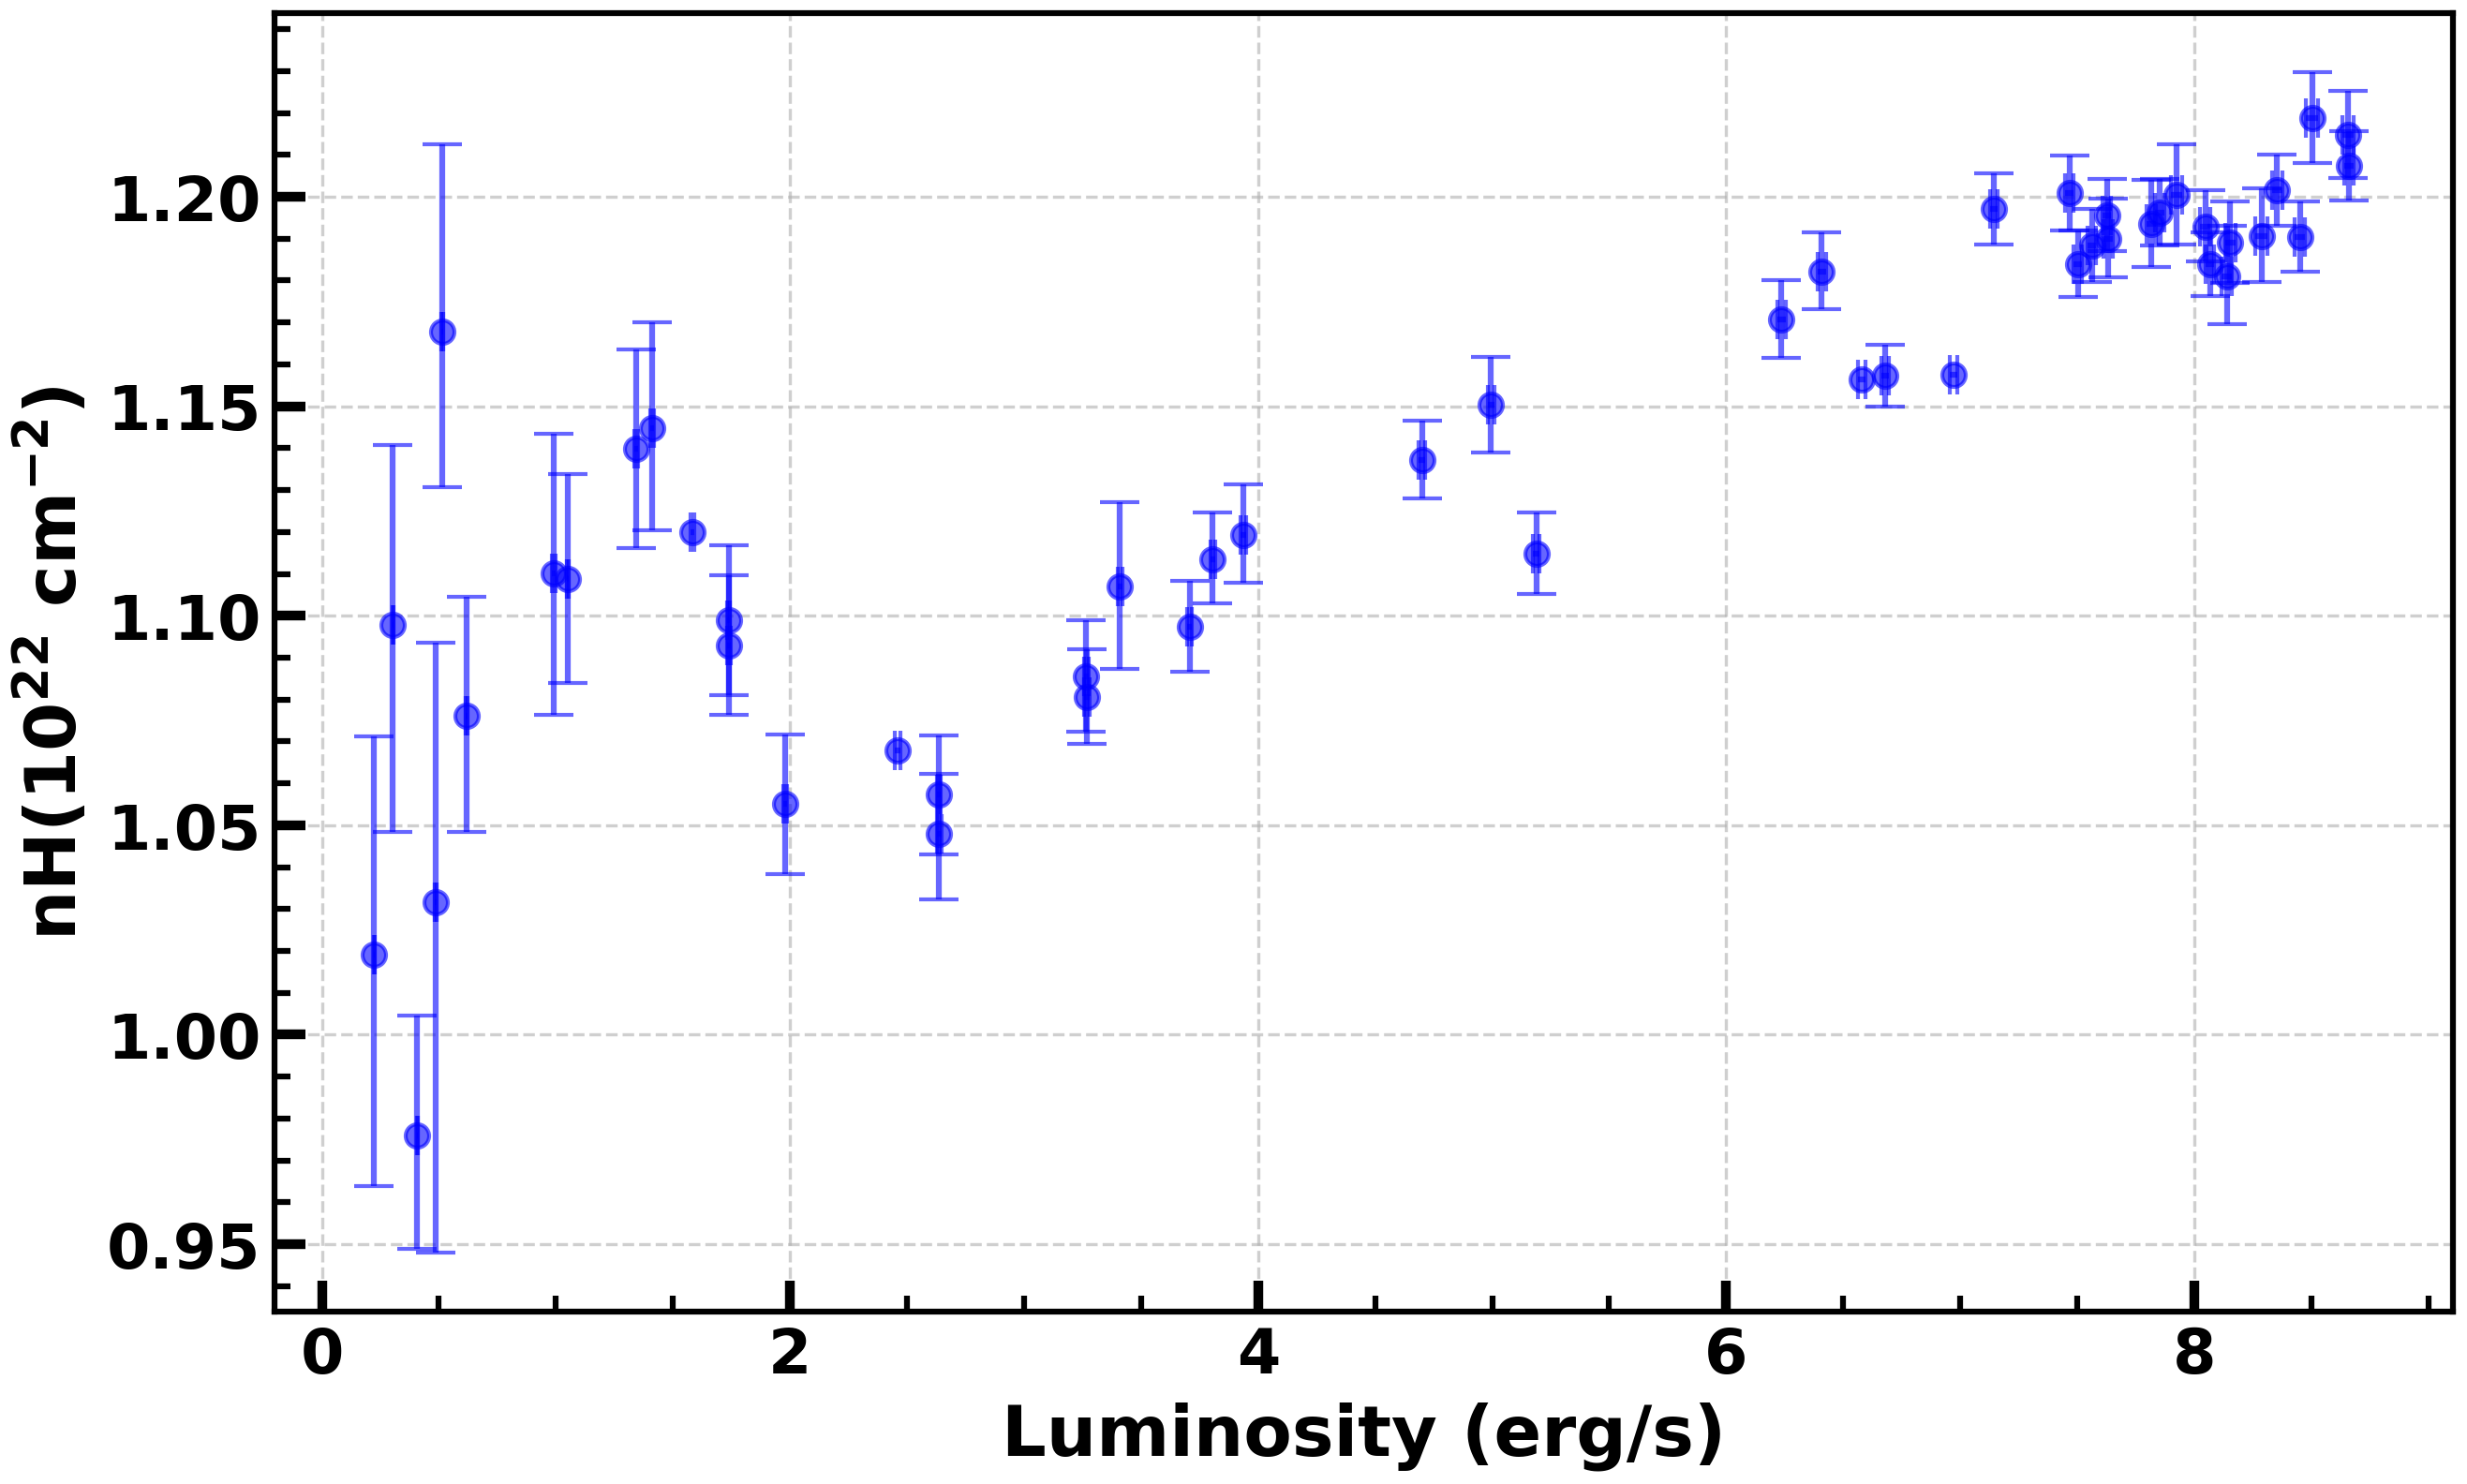

In [26]:
plt.figure(figsize=(10, 6))
nh_yerr = [np.abs(df_nicer['nH_err_low']), np.abs(df_nicer['nH_err_high'])]
xerr2=np.array(np.abs(df_nicer['Lumin_err_low'])/1e37, np.abs(df_nicer['Lumin_err_high'])/1e37)
plt.errorbar(df_nicer['Lumin']/1e37, df_nicer['nH'], yerr=nh_yerr,xerr=xerr2, fmt='o', capsize=5, color='b', label='nH_new',alpha=0.6)

# nh_yerr_old=[np.abs(df_old['nH_err_low']), np.abs(df_old['nH_err_high'])]
# plt.errorbar(df_old['Lumin'], df_old['nH'], yerr=nh_yerr_old, fmt='o', capsize=1, color='r', label='nH_old',alpha=0.3)

plt.ylabel("nH($10^{22}~\mathrm{cm}^{-2}$)")
plt.xlabel("Luminosity (erg/s)")
#plt.legend()
plt.grid(alpha=0.6,linestyle='--')
plt.minorticks_on()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_nH_vs_lumin.png",dpi=500,bbox_inches='tight')

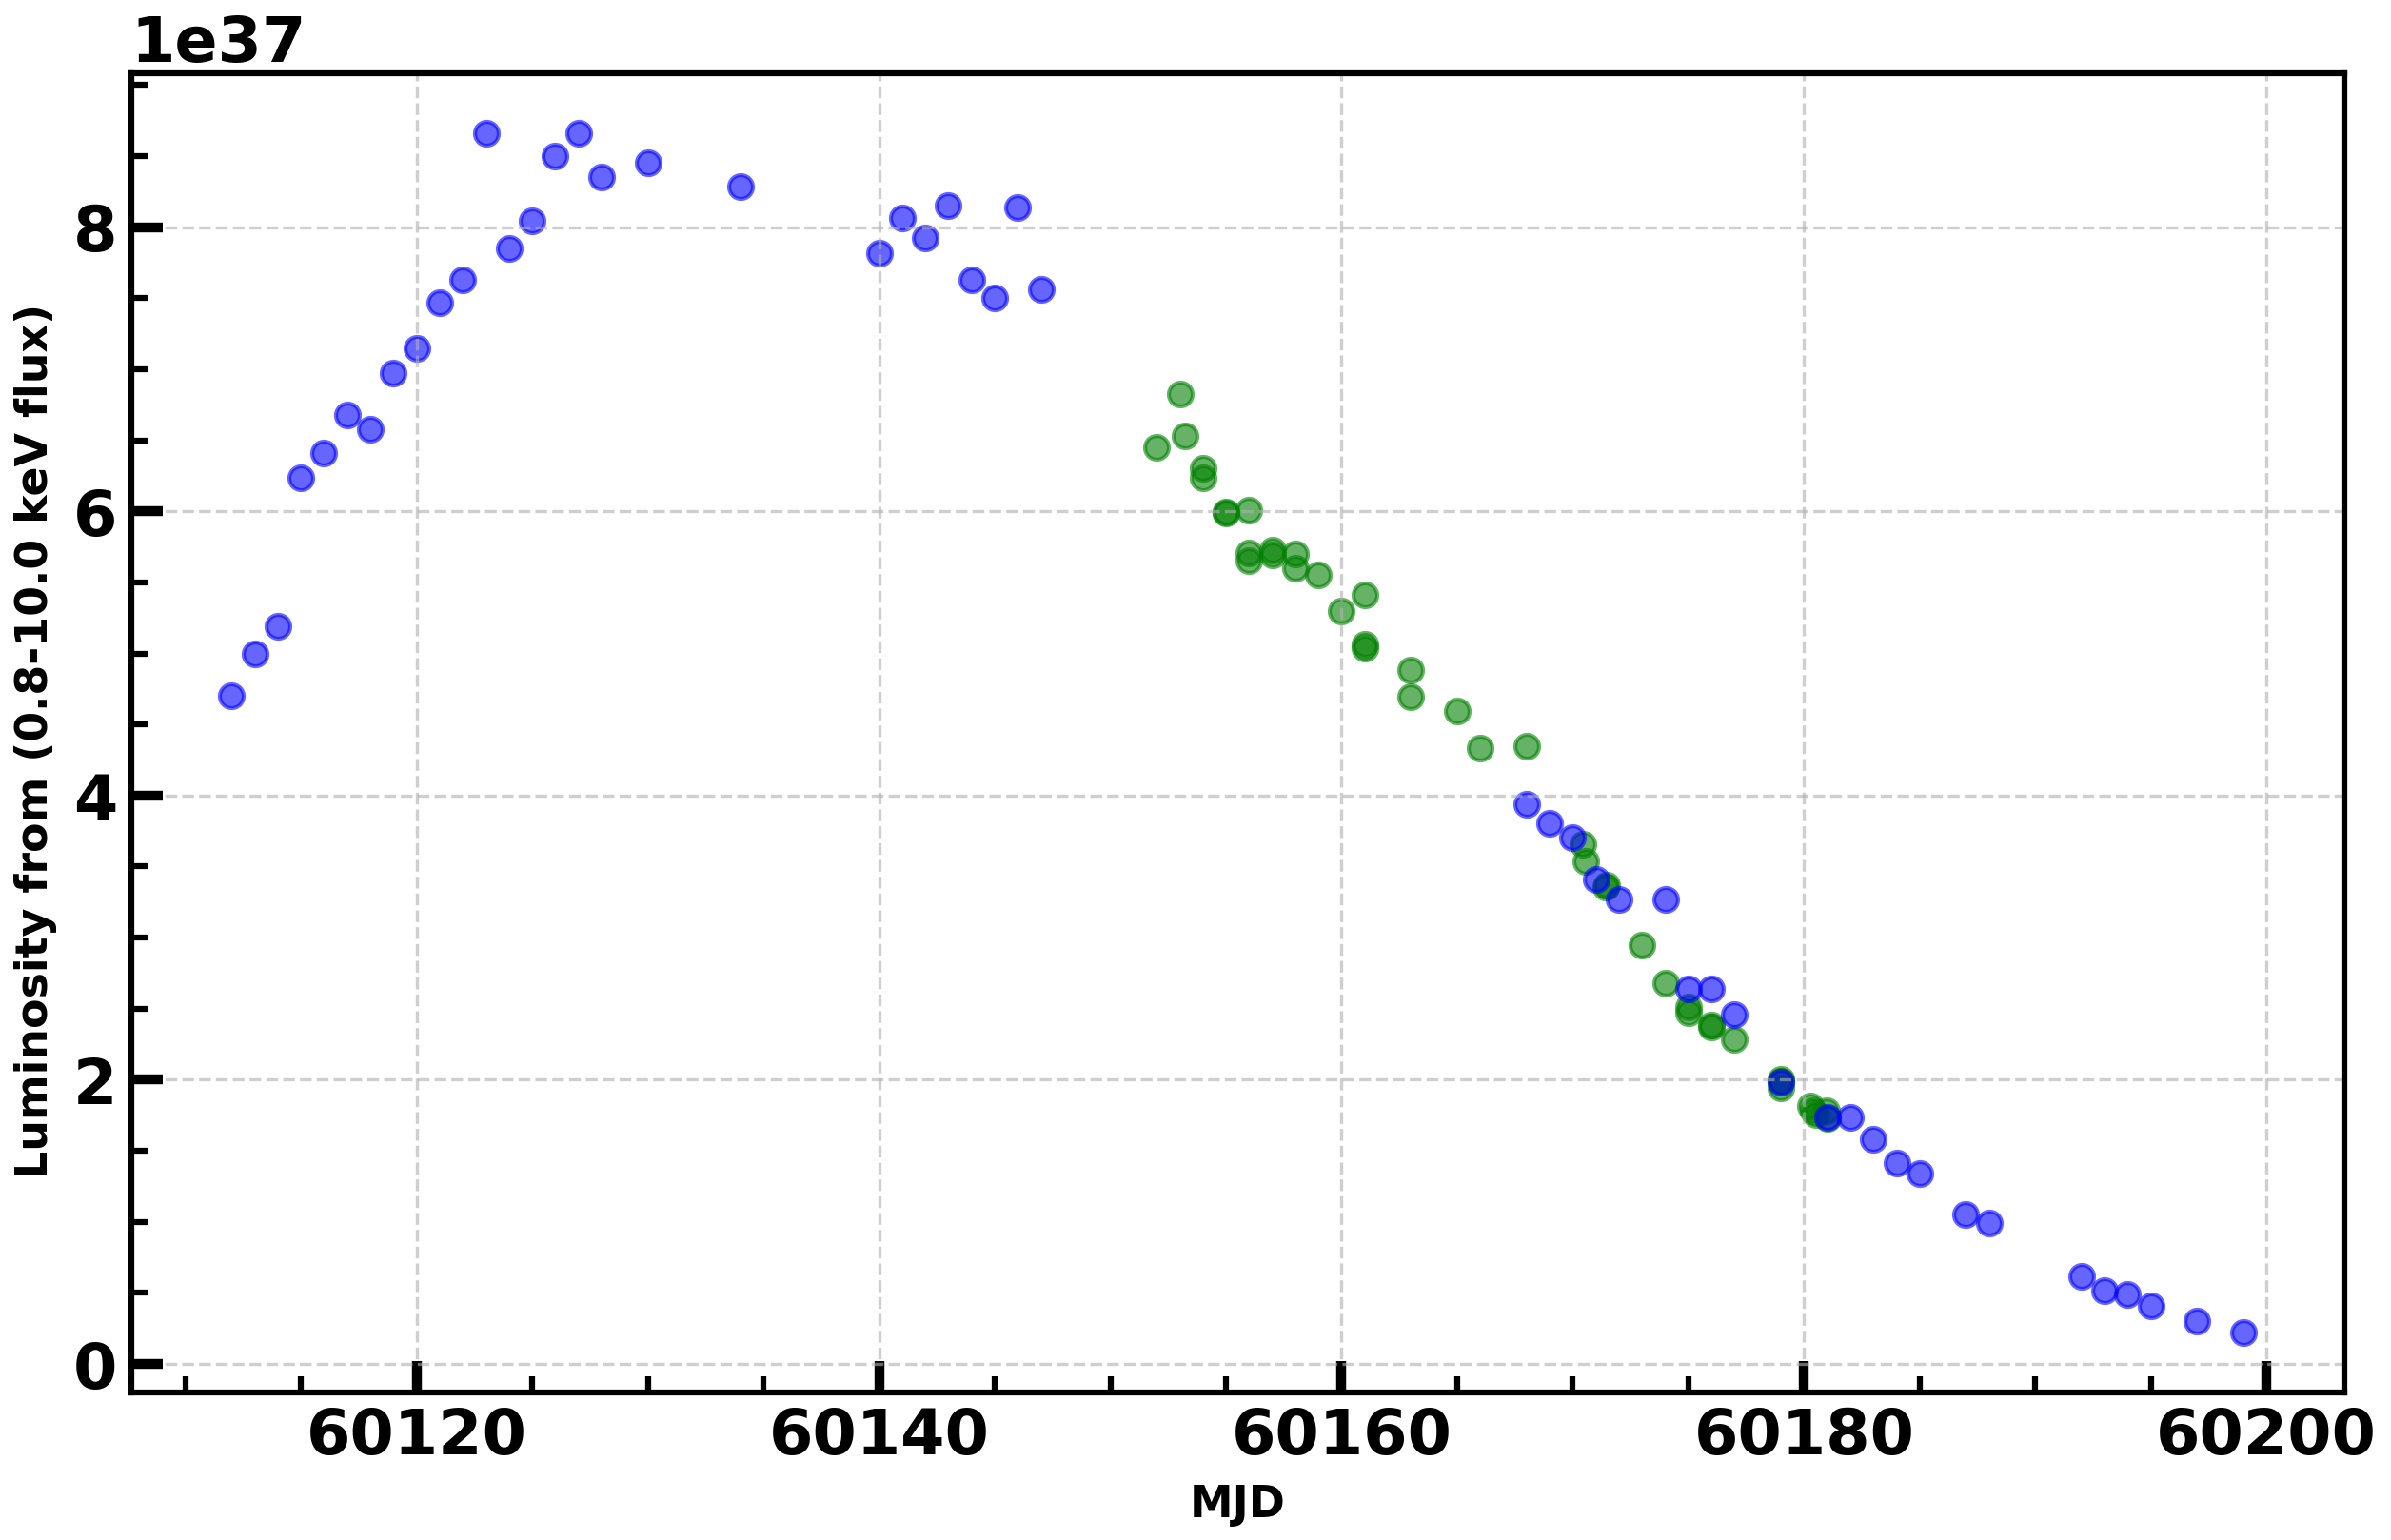

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df_hxmt['MJD'], df_hxmt['Lumin'], color='g', label='Luminosity_HXMT',alpha=0.6)
plt.scatter(df_nicer['MJD'], df_nicer['Lumin'], color='b', label='Luminosity_NICER',alpha=0.6)
#plt.scatter(df_hxmt_old['MJD'], df_hxmt_old['Lumin'], color='r', label='Luminosity_NICER_old',alpha=0.6)
plt.ylabel("Luminosity from (0.8-10.0 keV flux) ",fontsize=11)
plt.xlabel("MJD",fontsize=11)
plt.grid(linestyle="--",alpha=0.6)
plt.minorticks_on()
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_lumin_vs_MJD.png",dpi=500,bbox_inches='tight')

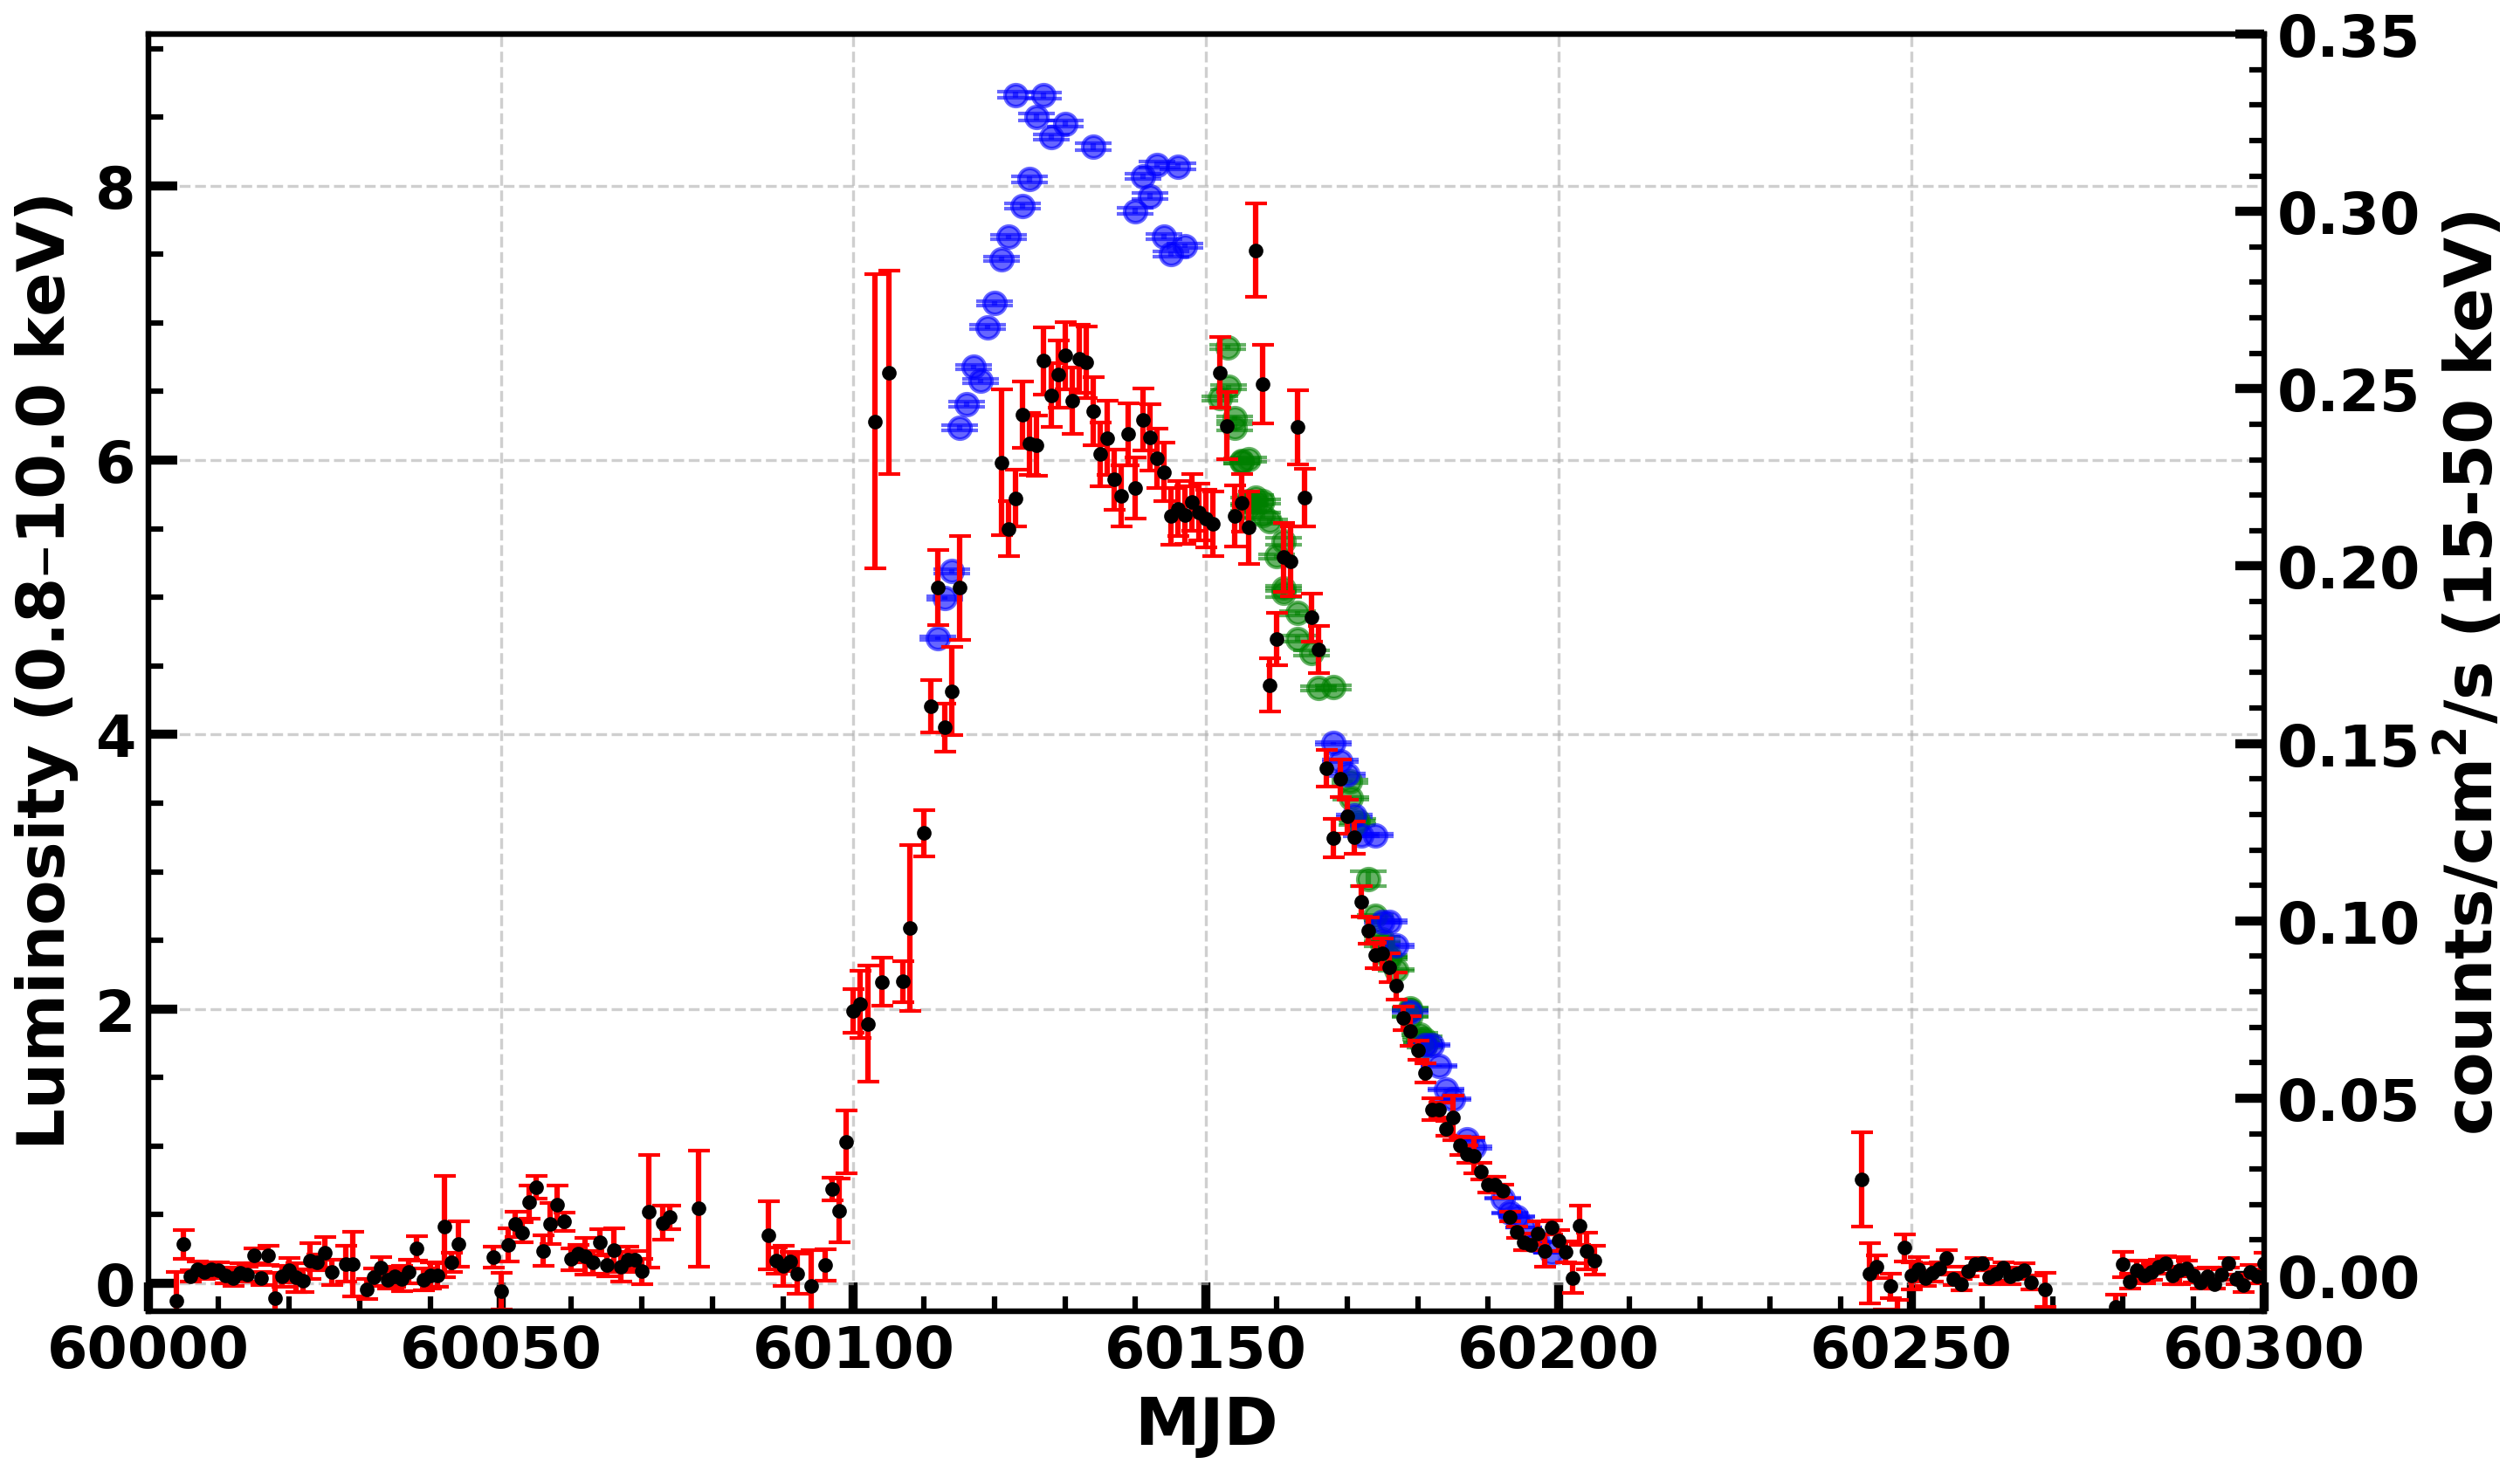

In [29]:
yerr2=np.array(np.abs(df_nicer['Lumin_err_low'])/1e37, np.abs(df_nicer['Lumin_err_high'])/1e37)
yerr1=np.array(np.abs(df_hxmt['Lumin_err_low'])/1e37, np.abs(df_hxmt['Lumin_err_high'])/1e37)

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left y-axis: Luminosity ---
ax1.errorbar(df_hxmt['MJD'], df_hxmt['Lumin']/1e37, yerr=yerr1,fmt='o', capsize=5, color='g', label='Luminosity_HXMT', alpha=0.6)
ax1.errorbar(df_nicer['MJD'], df_nicer['Lumin']/1e37, yerr=yerr2, fmt='o', capsize=5, color='b', label='Luminosity_NICER', alpha=0.6)
ax1.set_ylabel(r"$\mathrm{Luminosity}$ (0.8–10.0 keV)")
ax1.set_xlabel("MJD")
ax1.grid(linestyle="--", alpha=0.6)
ax1.tick_params(axis='y', labelcolor='black')
ax1.minorticks_on()

# --- Right y-axis: Count Rate with error ---
ax2 = ax1.twinx()
ax2.errorbar(time, rate, yerr=error, fmt='o', ecolor='r', capsize=3,
             markersize=3, markeredgewidth=1, label='Count Rate', color='black')
ax2.set_ylabel(r"$\mathrm{counts/cm^2/s}$ (15-50 keV)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# --- Limits and layout ---
ax1.set_xlim(60000, 60300)
ax2.set_ylim(-0.01, 0.35)
fig.tight_layout()

# --- Legends ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=11)

# --- Save and show ---
plt.savefig("/home/supremekai/thesis/J0243_6p6124/combined_lumin_rate_vs_MJD_with_SWIFT.png", dpi=500, bbox_inches='tight')
plt.show()


In [36]:
# Plot lineE vs Luminosity with error bars
plt.figure(figsize=(8, 5))
yerr_lineE = [np.abs(df_2['lineE_err_low']), np.abs(df_2['lineE_err_high'])]
plt.errorbar(df_2['Lumin'], df_2['lineE'], yerr=yerr_lineE, fmt='o', color='b', alpha=0.6, capsize=5)
plt.xlabel("Luminosity")
plt.ylabel("lineE")
plt.grid(alpha=0.6, linestyle='--')
plt.minorticks_on()
#plt.title("lineE vs Luminosity")
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_lineE.png", dpi=500, bbox_inches='tight')
plt.show()



NameError: name 'df_2' is not defined

<Figure size 2400x1500 with 0 Axes>

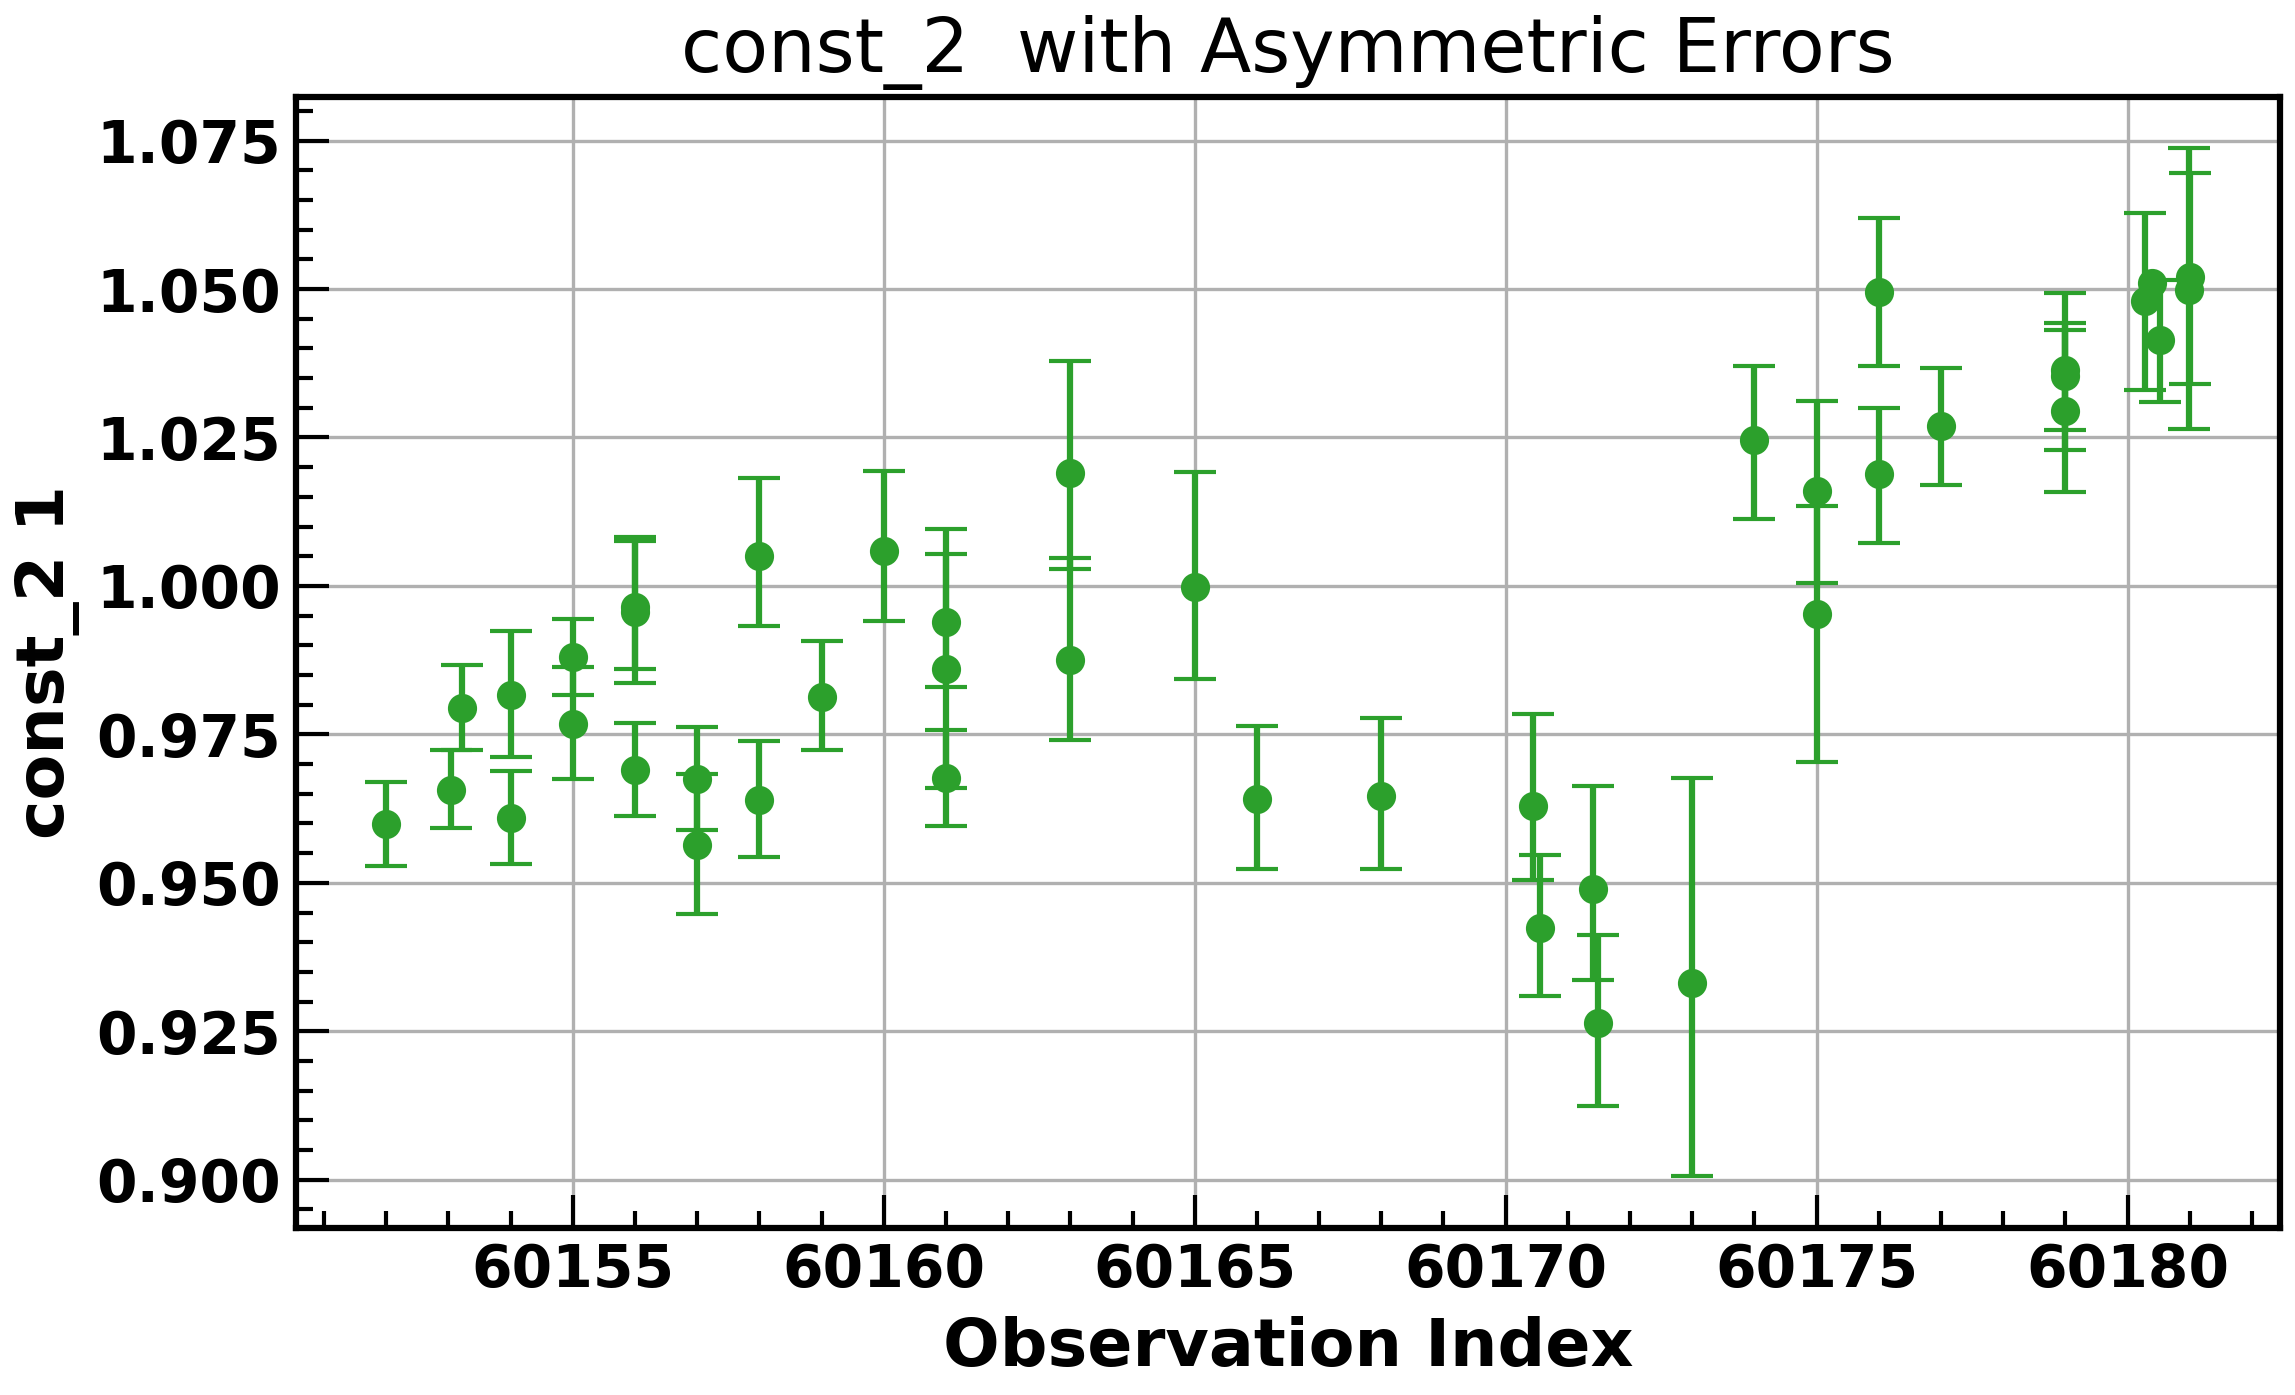

In [60]:
plot_asymmetric_errorbars(
    df,
    x_col='MJD',
    y_col='const_2',
    yerr_low_col='const_2_err_low',
    yerr_high_col='const_2_err_high',
    xlabel='Observation Index',
    ylabel='const_2 1',
    title='const_2  with Asymmetric Errors',
    color='tab:green'
)


In [61]:
df.columns

Index(['Comments', 'ID ', 'MJD', 'Energy', '2.09848E+22',
       'cflux (dist 6.8 kpc)', 'cflux_err', 'logLumin', 'Lumin', 'Lumin_err',
       'Model', 'nH', 'index', 'norm', 'highecut', 'folding_energy', 'const_1',
       'const_2', 'const_3', 'chi sq/dof', 'index_err', 'norm_err',
       'highecut_err', 'folding_energy_err', 'const_1_err', 'const_2_err',
       'seq', 'cflux_err_low', 'cflux_err_high', 'Lumin_err_low',
       'Lumin_err_high', 'index_err_low', 'index_err_high', 'norm_err_low',
       'norm_err_high', 'highecut_err_low', 'highecut_err_high',
       'folding_energy_err_low', 'folding_energy_err_high', 'const_1_err_low',
       'const_1_err_high', 'const_2_err_low', 'const_2_err_high'],
      dtype='object')

### Plot luminosity and subpanel of period

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('astro')  # if in ~/.config/matplotlib/stylelib/astro.mplstyle

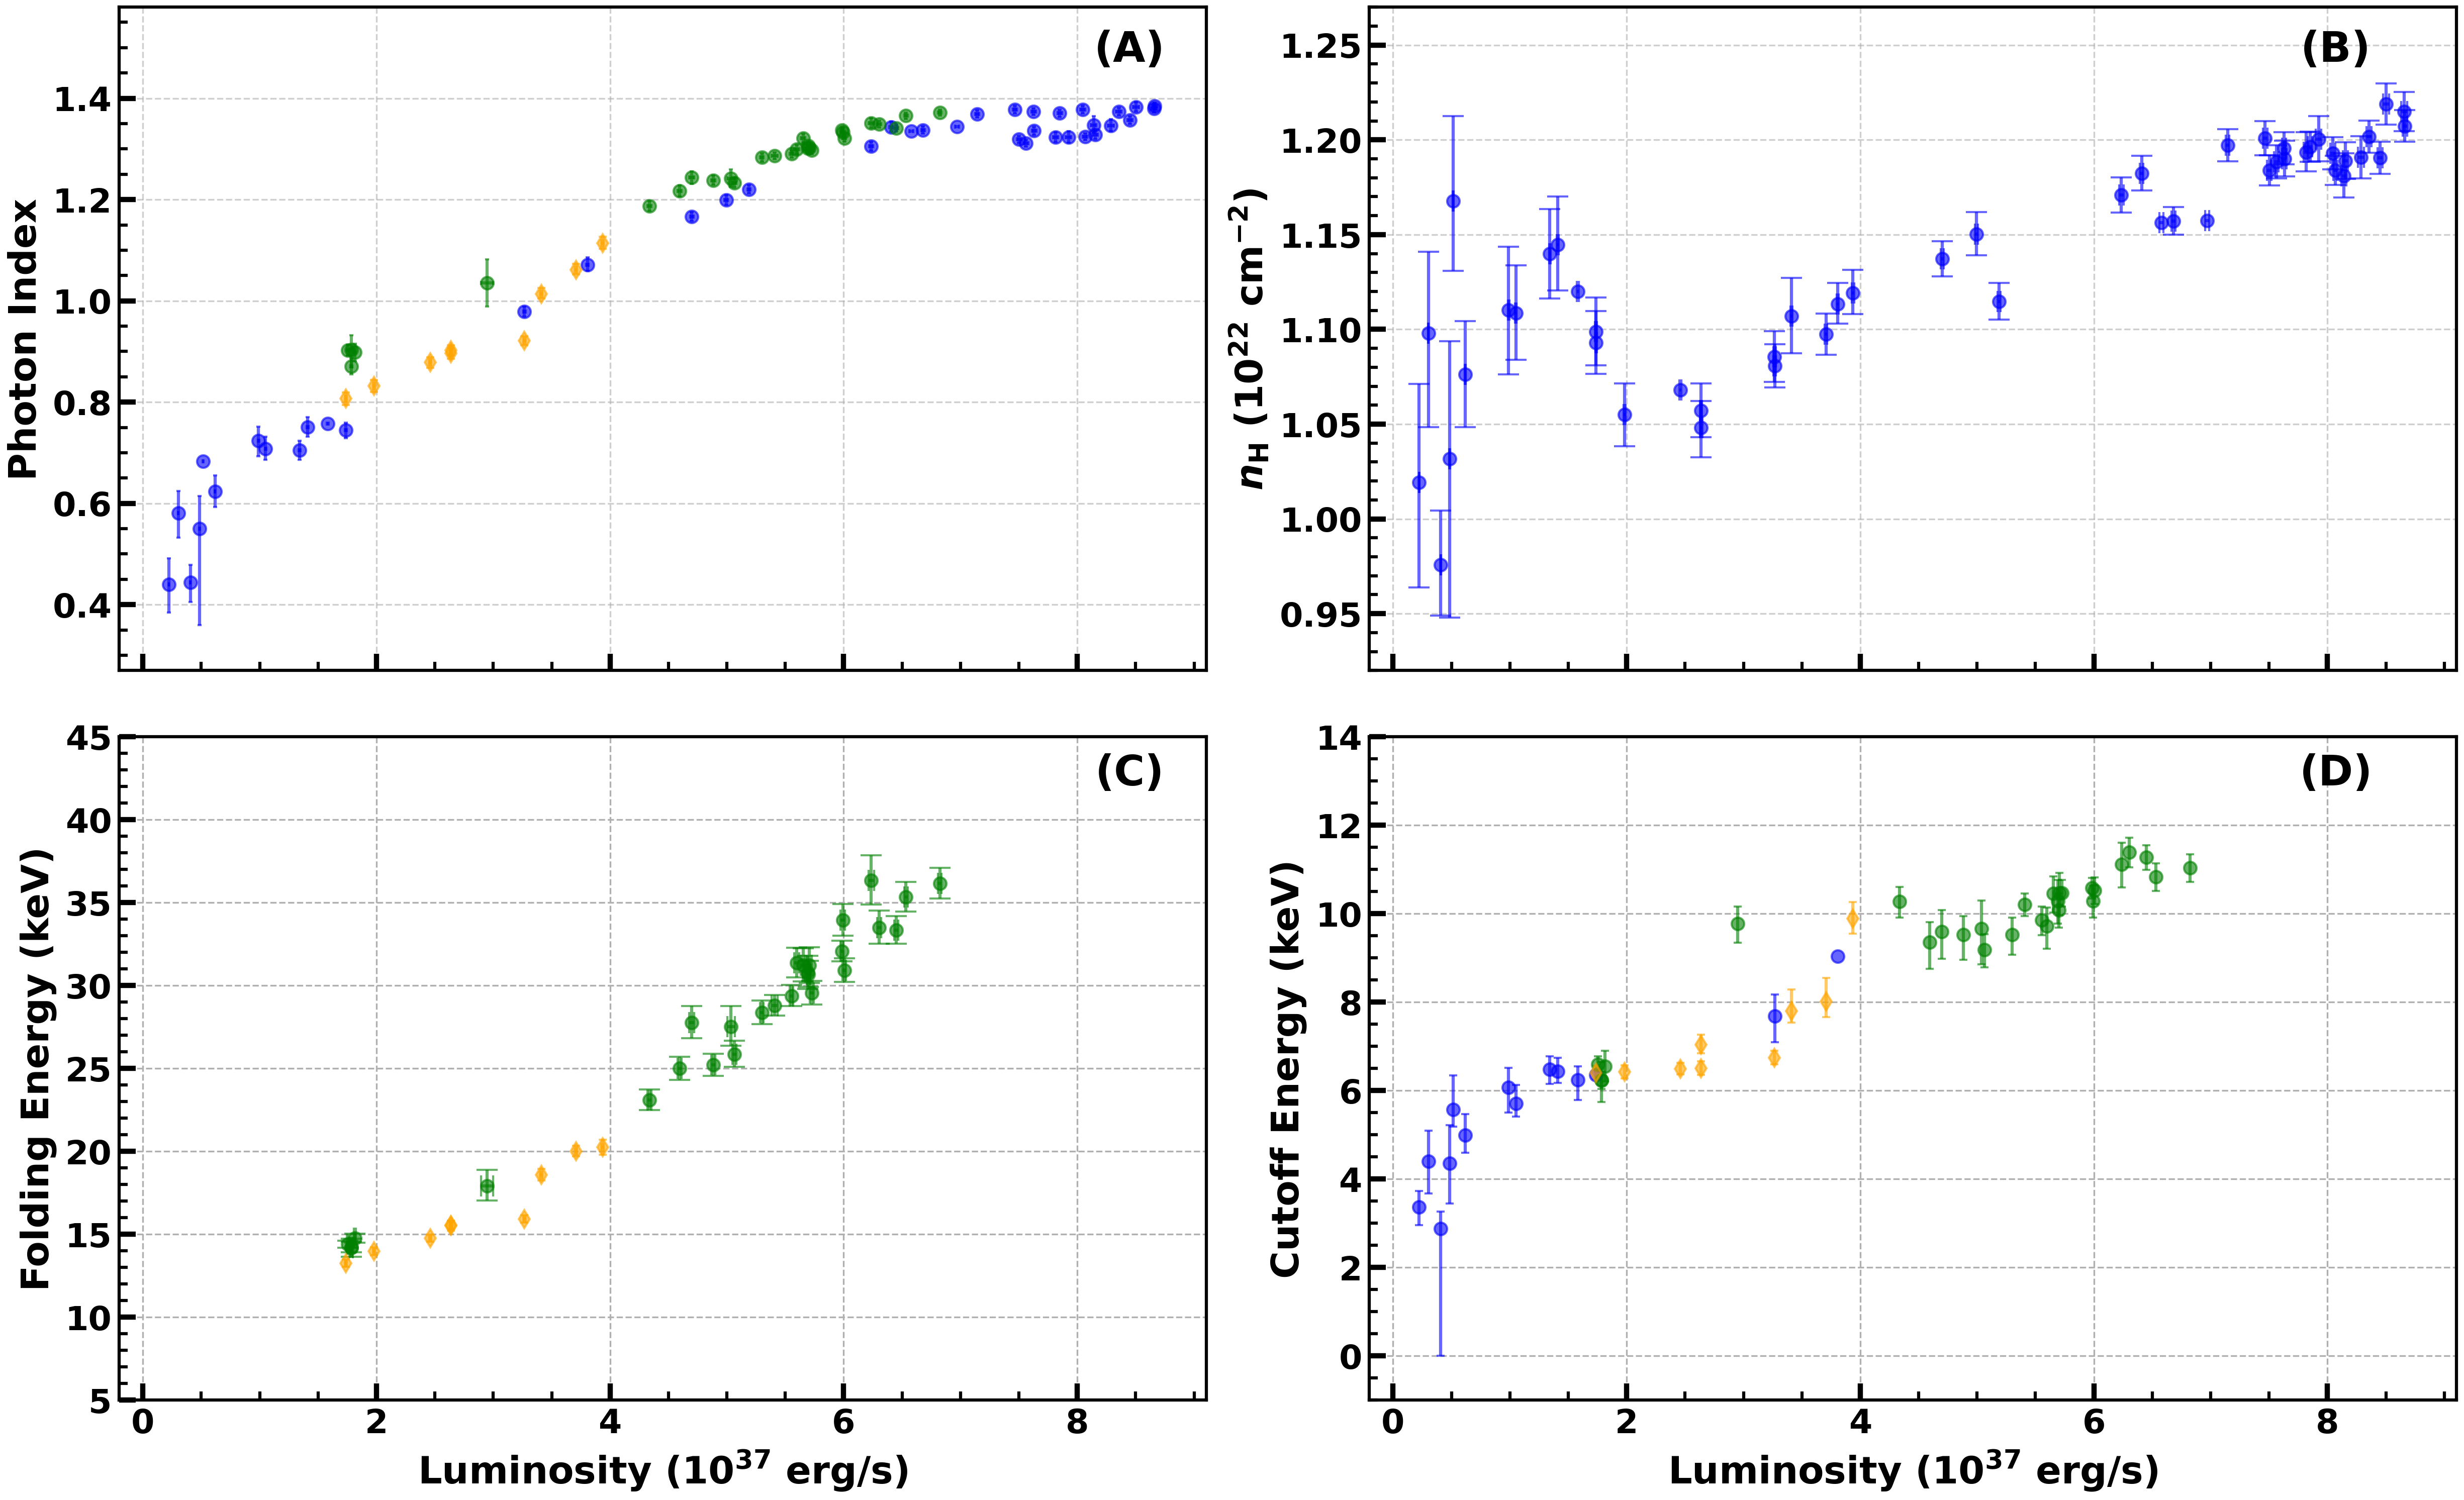

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
plt.subplots_adjust(hspace=0.1, wspace=0.15)

### --- Plot 1: Photon Index ---
ax = axs[0, 0]
yerr = [np.abs(df_nicer_index_plot['index_err_low']), np.abs(df_nicer_index_plot['index_err_high'])]
xerr = [np.abs(df_nicer_index_plot['Lumin_err_low'])/1e37, np.abs(df_nicer_index_plot['Lumin_err_high'])/1e37]
ax.errorbar(df_nicer_index_plot['Lumin']/1e37, df_nicer_index_plot['index'], yerr=yerr, xerr=xerr, fmt='o', capsize=1, color='b', label='NICER', alpha=0.6)

yerr = [np.abs(df_hxmt_index_plot['index_err_low']), np.abs(df_hxmt_index_plot['index_err_high'])]
xerr = [np.abs(df_hxmt_index_plot['Lumin_err_low'])/1e37, np.abs(df_hxmt_index_plot['Lumin_err_high'])/1e37]
ax.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['index'], yerr=yerr, xerr=xerr, fmt='o', capsize=1, color='g', label='HXMT', alpha=0.6)

yerr_simul = np.array([df_simul['index_1_err_low'], df_simul['index_1_err_high']])
xerr2 = [np.abs(df_simul['Lumin_err_low'])/1e37, np.abs(df_simul['Lumin_err_high'])/1e37]
ax.errorbar(df_simul['Lumin']/1e37, df_simul['index_1'], yerr=yerr_simul, xerr=xerr2, fmt='d', color='orange', capsize=2, mfc=None, alpha=0.6, label="Simultaneous")

ax.set_ylabel("Photon Index")
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylim(0.27,1.58)
ax.minorticks_on()
# ax.legend()  # Optional

### --- Plot 2: nH ---
ax = axs[0, 1]
nh_yerr = [np.abs(df_nicer['nH_err_low']), np.abs(df_nicer['nH_err_high'])]
xerr2 = [np.abs(df_nicer['Lumin_err_low'])/1e37, np.abs(df_nicer['Lumin_err_high'])/1e37]
ax.errorbar(df_nicer['Lumin']/1e37, df_nicer['nH'], yerr=nh_yerr, xerr=xerr2, fmt='o', capsize=5, color='b', label='nH_new', alpha=0.6)

ax.set_ylabel(r"$n_\mathrm{H}$ ($10^{22}~\mathrm{cm}^{-2}$)")
ax.grid(alpha=0.6, linestyle='--')
ax.minorticks_on()
ax.set_ylim(0.92,1.27)
# ax.legend()  # Optional

### --- Plot 3: Folding Energy ---
ax = axs[1, 0]
yerr_folding = [np.abs(df_hxmt_index_plot['folding_energy_err_low']), np.abs(df_hxmt_index_plot['folding_energy_err_high'])]
xerr_folding = [np.abs(df_hxmt_index_plot['Lumin_err_low'])/1e37, np.abs(df_hxmt_index_plot['Lumin_err_high'])/1e37]
ax.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['folding_energy'], yerr=yerr_folding, xerr=xerr_folding, fmt='o', capsize=5, color='g', label='HXMT', alpha=0.6)

yerr_highecut_simul = [np.abs(df_simul['folding_energy_err_low']), np.abs(df_simul['folding_energy_err_high'])]
xerr_highecut_simul = [np.abs(df_simul['Lumin_err_low'])/1e37, np.abs(df_simul['Lumin_err_high'])/1e37]
ax.errorbar(df_simul['Lumin']/1e37, df_simul['folding_energy'], yerr=yerr_highecut_simul, xerr=xerr_highecut_simul, fmt='d', capsize=2, color='orange', label='Simultaneous', alpha=0.6)

ax.set_ylabel("Folding Energy (keV)")
ax.set_ylim(5, 45)
ax.grid(True, linestyle="--")
ax.minorticks_on()

### --- Plot 4: Cutoff Energy ---
ax = axs[1, 1]
yerr_highecut_df2 = [np.abs(df_nicer_index_plot['highecut_err_low']), np.abs(df_nicer_index_plot['highecut_err_high'])]
ax.errorbar(df_nicer_index_plot['Lumin']/1e37, df_nicer_index_plot['highecut'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='blue', label='NICER', alpha=0.6)

yerr_highecut_hxmt = [np.abs(df_hxmt_index_plot['highecut_err_low']), np.abs(df_hxmt_index_plot['highecut_err_high'])]
ax.errorbar(df_hxmt_index_plot['Lumin']/1e37, df_hxmt_index_plot['highecut'], yerr=yerr_highecut_hxmt, fmt='o', capsize=2, color='g', label='HXMT', alpha=0.6)

yerr_highecut_simul = [np.abs(df_simul['highecut_err_low']), np.abs(df_simul['highecut_err_high'])]
ax.errorbar(df_simul['Lumin']/1e37, df_simul['highecut'], yerr=yerr_highecut_simul, fmt='d', capsize=2, color='orange', label='Simultaneous', alpha=0.6)

ax.set_ylabel("Cutoff Energy (keV)")
ax.set_ylim(-1, 14)
ax.grid(True, linestyle="--")
ax.minorticks_on()

### Shared X-label across bottom
for ax in axs[1, :]:
    ax.set_xlabel("Luminosity ($10^{37}$ erg/s)")

fig.text(0.46, 0.85, '(A)', ha='center',fontsize=20)
fig.text(0.86, 0.85, '(B)', ha='center',fontsize=20)
fig.text(0.46, 0.45, '(C)', ha='center',fontsize=20)
fig.text(0.86, 0.45, '(D)', ha='center',fontsize=20)

### Save and show
plt.savefig("/home/supremekai/thesis/J0243_6p6124/plot_spectral_vs_lumin_combined.png", dpi=500, bbox_inches='tight')
plt.show()
